# Séries Temporais

Em DS utiliza as predições para antecipar o futuro em um período de tempo.


**Por que faze predições temporais?**

- mais organização.
- melhor gerenciamento de estoque.
- auxílio na compra de matéria prima.

# Método de Gerenciamento de Projeto  - CRISP

<img src = "./img/CRISP_1.png">

# <span style='color:rgb(230, 230, 0)'> Entendimento do Negócio

# <span style='color:blue'> Coleta de Dados

Coleta de dados em banco de dados ou por web scraping

# <span style='color:blue'>Limpeza dos Dados

## Passo 1 - Descrição dos Dados

In [5]:
# Copia
df1 = df_raw.copy()

### 1.1 Rename Columns (sempre faça isso para facilitar)

- Utilize a propriedade **columns** para pegar os nomes das colunas.

colunas = df.columns[0]

- Instale a biblioteca **inflection** para transformar em **snakecase**

In [6]:
cold_old = df_raw.columns[0]

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [8]:
# Função Lambda para aplicar
snakecase = lambda x: inflection.underscore( x )

# Map aplicar uma função em cada elemento de uma lista
cols_new = list(map(snakecase,cols_old))

# rename
df1.columns = cols_new

### 1.2 Data Dimensions

**Quantidade de dados**

Por que saber isso? Para saber se você tem recurso o suficiente para trabalhar no projeto.

Exemplo: temos 1 trilhão de linhas, logo talvez você precise deu um: Servidor, Cluster de Máquinas ou linguagem apropriada ( Spark / Hadoop)

Use a propriedade df.**shape** (linha, colunas)

In [9]:
print(f'number of rows: {df1.shape[0]}') # Linhas
print(f'number of rows: {df1.shape[1]}') # Colunas

number of rows: 1017209
number of rows: 18


### 1.3 Data type

Use a propriedade df.**dtypes** para ver o tipo

- no pandas object é **string**
- sempre mude datas que estão em (int / float) para **datetime**

In [ ]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

Use a função pd.**to_datetime( )** para converter em data

In [ ]:
# Mudar pra date type
df1['date'] = pd.to_datetime( df1['date'] )

Mudar para inteiro por exemplo, use df[ 'coluna' ]**.astype(int)**

In [ ]:
# Exemplo
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

### 1.4 Check NA

**Qual o volume de dados Faltantes ( NA / Vazios ) do seu Dataset?**

**Por que** saber isso? 

- <span style = 'color:green'>Ajuda a **tomar decisões** - </span> Não fazer o projeto por falta de dados. Ou dar um jeito de **preencher** esses dados com **lógica** ou **algorítimos**.
- <span style = 'color:green'>Ajuda a **entender o motivo** desses dados estarem faltando - </span> Problema no Sistema... Input's manuais errados / faltando




Use as funções df**.isnull( )** + **sum( )** para visualizar

In [ ]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

**O que fazer quando temos dados faltantes?**

1-) podemos **descartar* as linhas -> df1.**dropna()** ... problema que você perde informações.

2-) usar **algorítmos** de ML ( Decision Tree é uma boa escolha ) para prever os valores vazios.
 (Quando você não tem informações dos dados)

3-) Entender o problema e usando sua **lógica**.

### 1.7 Descriptive Statistical

**Para que serve Descriptive Statistical?**

- 1º Ganhar conhecimento de Negócio.

- 2º Conseguir detectar alguns erros.

**Estatística Descritiva** é dividida em duas métrias de 1º ordem: **Métricas de Dispersão** e **Métricas de Tendência Central**

**Métrica de Dispersão**

- Variância
- Desvio Padrão
- Min e Max
- Range   -> Max - Min
- Skew    -> é uma representação do quão deslocado está sua distribuição normal, quanto mais próximo de ZERO, mais centralizada está.
- Kurtose -> diz quão alto está seu pico, valor ideal é 1.

**Métrica de Tendência Central** - Resume os dados em **um único número**

- Média -> soma-se tudo e divide pelo número total de elementos
- Mediana -> pega-se o valor central da tabela (se for nº par, você deve fazer (x1+x2)/ 2 )
- Moda -> elemento que mais se repete


**Métrica de Tendência Central + Métrica de Dispersão**

A **métrica de tendência cental** nos dá um valor central, mas não nos informam como os dados estão dispersos entorno desse valor. Logo, necessita-se aplicar as **métricas de dispersão** para saber se os dados estão **concentrados** ou **dispersos** dos **valores centrais**.



#### 1.7.1 Separar Atributos NUMÉRICOS e Atributos CATEGÓRICOS

In [13]:
#Atributos Numéricos ( Média, Mediana, Desvio.P, Min, Max, Rang, Skew, Kurtose)
num_attributes = df1.select_dtypes(include = ['int64','float64'])

#Atributos Categóricos ( Boxplot / Violin )
cat_attributes = df1.select_dtypes(exclude = ['int64','float64','datetime64[ns]'])

#### 1.7.2 Atributos Numéricos

##### 1.7.2.1 Metric of Central Tendency

In [14]:
# Central Tendency - Mean and Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean )).T
ct2 = pd.DataFrame( num_attributes.apply( np.median )).T

##### 1.7.2.2 Metric of Dispersion

In [ ]:
# Dispersion - std(desvio padrao), min, max, range(max-min), skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate        Ordem que quero ver
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median','std','skew','kurtosis'] 

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


Exemplo de algumas análises que podemos fazer com a tabela acima:

- COSTUMERS - Média de 633 pessoas na loja por dia, com desvio parão de 464... Logo, em um dia eu POSSO ter de 200 a 1000 pessoas em um dia.
- SALES - Média e Mediana com valores próximos, isso indica que os dados estão bem distribuidos em torno do ponto central.

##### 1.7.2.3 plot de distribuição - sns.**DISTPLOT( df['coluna'] )**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


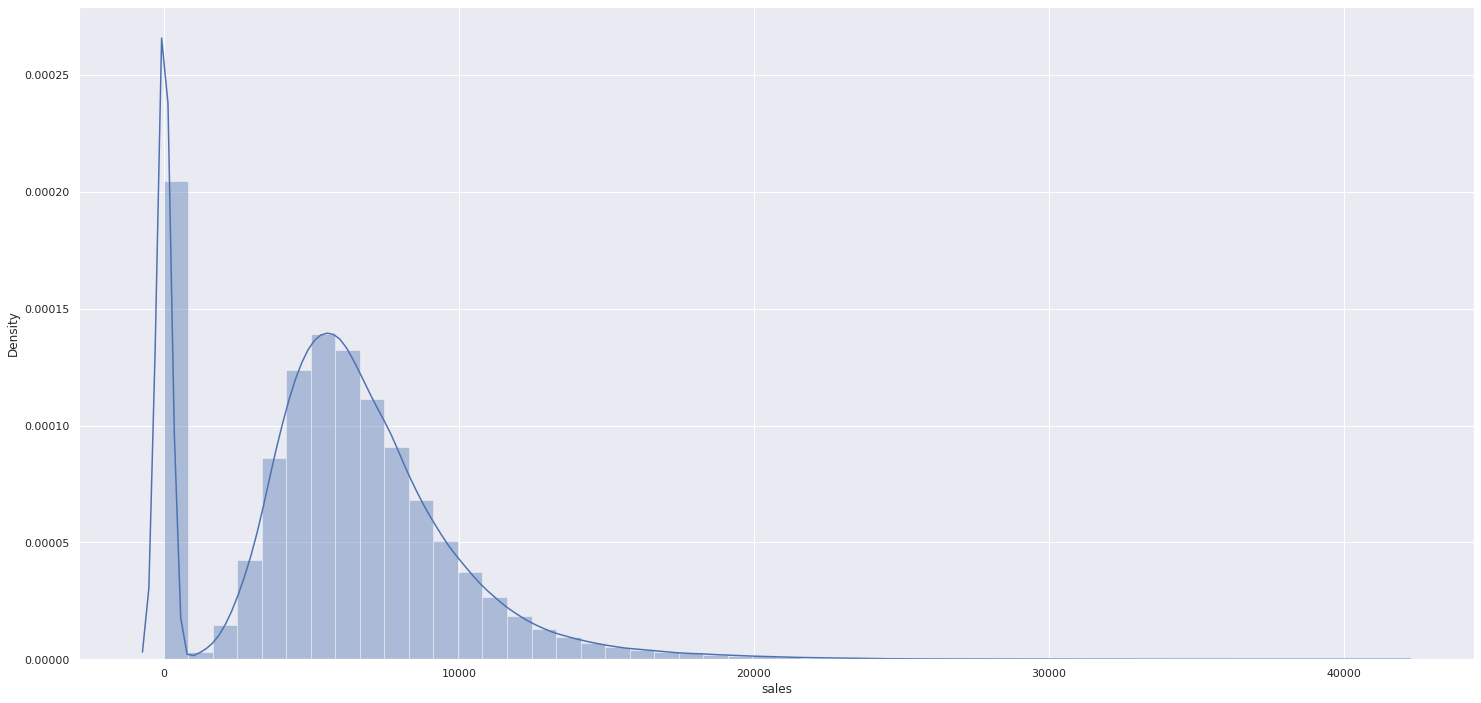

In [ ]:
sns.distplot(df1['sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


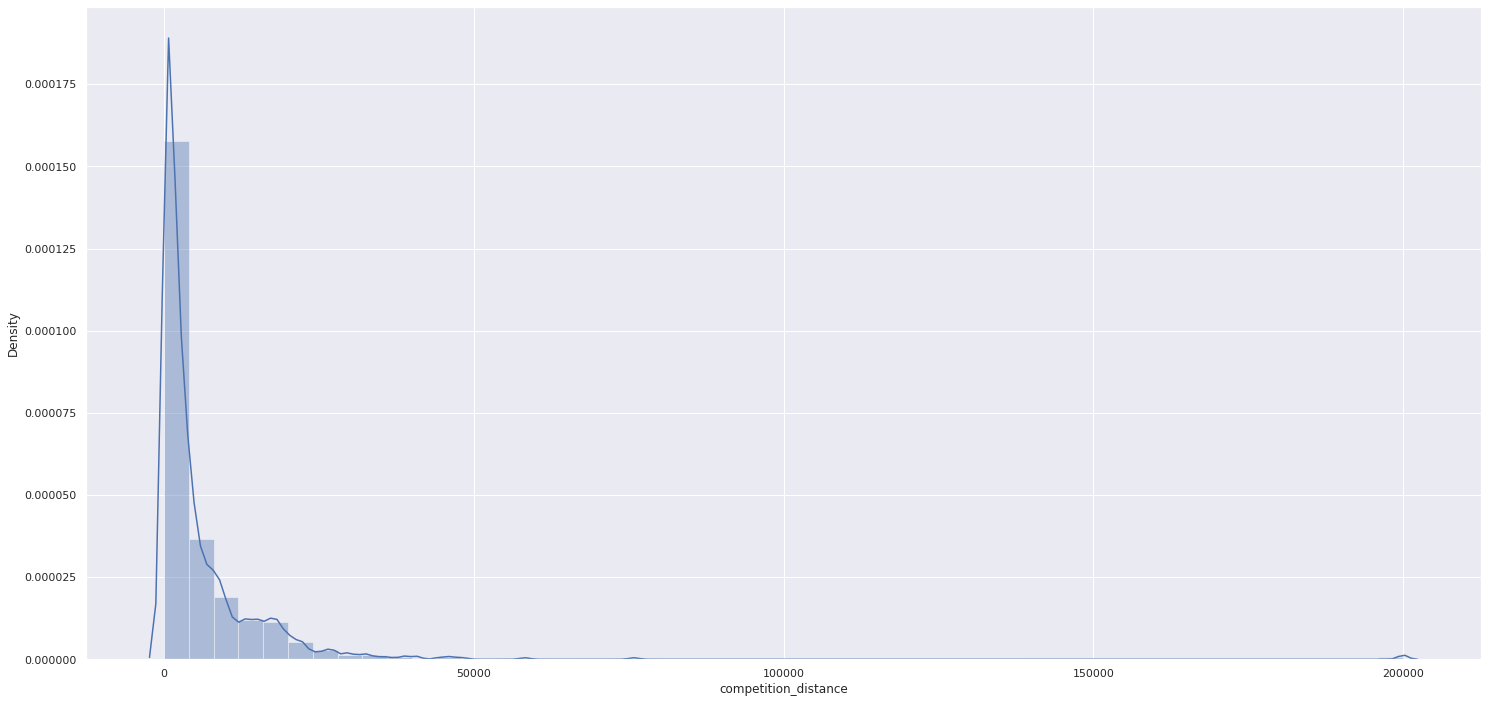

In [ ]:
# COMPETITION_DISTANCE
# - veja que a Skew está em 10... que significa que provavelmente tem um grande deslocamento nesta distribuição normal.
# - A uma Kurtosis gigantescac de 147... Logo deve ter dado um pico gigantesco

# Só de olhar a Skew e Kurtosis, parece que temos uma distribuição de Poisson... logo existe uma concentração muito alta
# de valores no começo.

sns.distplot(df1['competition_distance'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


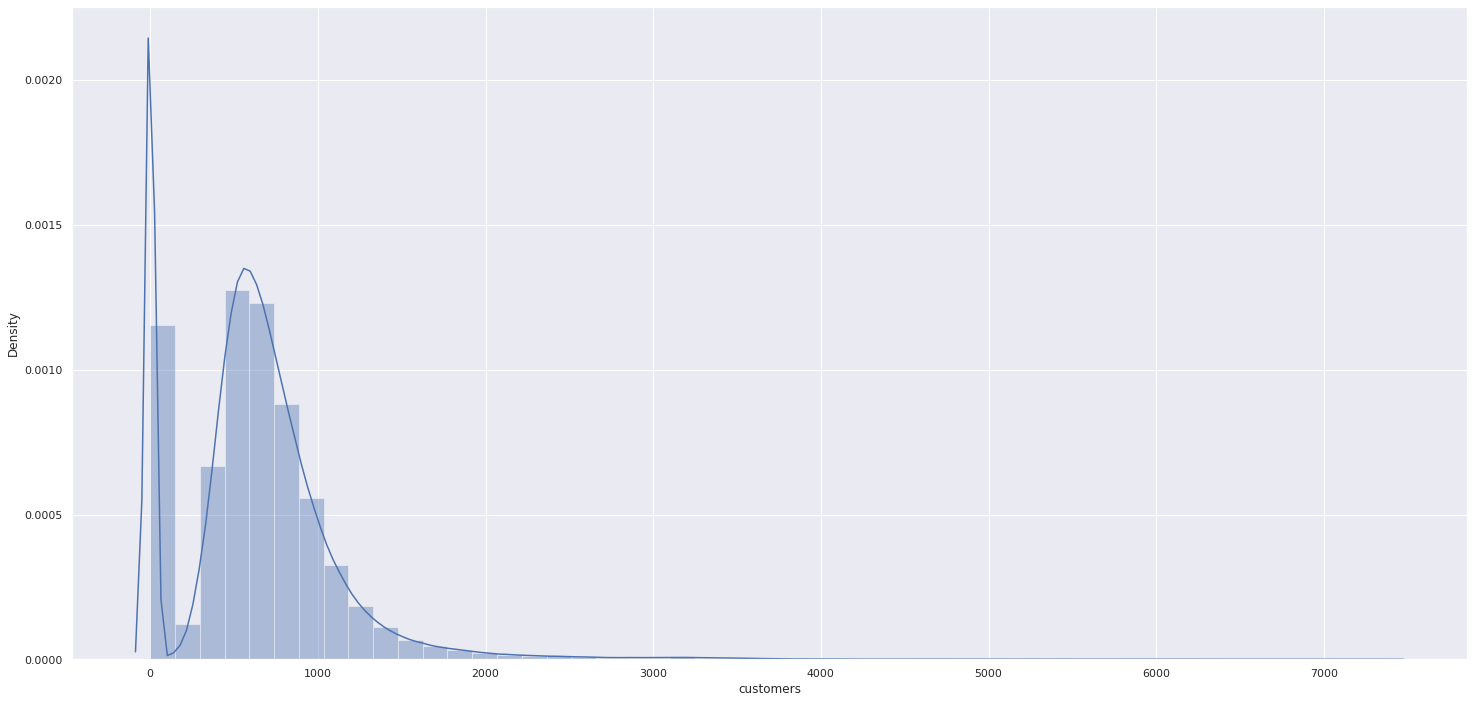

In [ ]:
sns.distplot(df1['customers'])

#### 1.7.3 Atributos Categóricos

In [ ]:
# Visualizar quantidade de categorias por coluna
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

##### 1.7.3.1 Box Plot

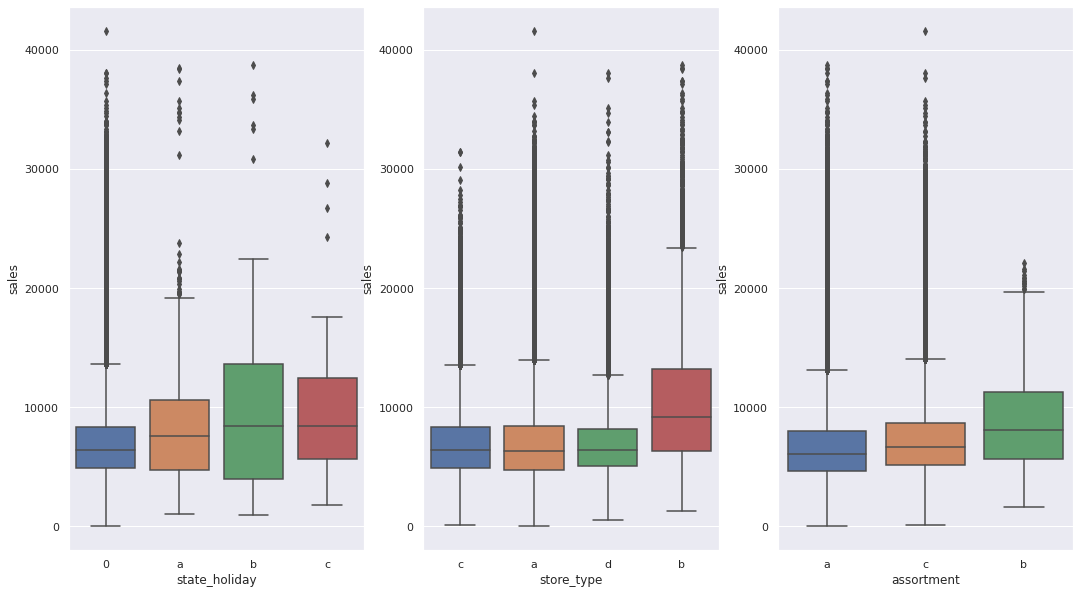

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)

aux1 = df1[ (df1['state_holiday'] != 0) & (df1['sales'] > 0) ]

plt.subplot(1,3,1)
sns.boxplot(
    x='state_holiday',
    y='sales',
    data=aux1
)
plt.subplot(1,3,2)
sns.boxplot(
    x='store_type',
    y='sales',
    data=aux1
)
plt.subplot(1,3,3)
sns.boxplot(
    x='assortment',
    y='sales',
    data=aux1
)

## Passo 2 - Feature Engineering

In [15]:
# Copy
df2 = df1.copy()

Nesta seção iremos em busca dos INSIGNS... E faremos uma avaliação de quais agentes são importantes para o modelo.

### 2.1 Mind Map Hypostesis

Usaremos o Coggle, para criar os mind map hypothesis.

1 - Nosso Fenômeno (o que estamos querendo modelar)-> Vendas Diáreas  (Fica no centro)

2 - Nossos agentes (agentes que impactam no fenômeno)-> Clientes, Localização, Produtos, Lojas, Temporal ( Ficam nos ramos)

3 - Características dos Agentes (atributos dos agentes)->  ficam nos Ramos dos Agentes

Exemplo:

<img src ="https://github.com/miguelzeph/curso_ds_em_producao/blob/master/img/MindMapHypothesis.png?raw=true"  width = 500px>

### 2.2 Criação das Hipóteses

Agora você vai no MIND MAP e olha as CARACTERÍSTICA DOS AGENTES.. e relaciona com o FENÔMENO

Exemplo: AGENTE loja tem CARACTERÍSTICA de nº de funcionário... relacione isso com o FENÔMENO vendas... por exemplo, Quanto mais funcionários, mais vendas (é uma hipóstese a ser avaliada)

Faça isso para todas as características


OBS: Se você não tem essa CARACTERÍSTICA no momento, apenas RISQUE ela, lembre-se que estamos trabalhando com o método CRISP, iremo novamente passar por aqui, talvez seja necessário correr atrás destes dados.

#### 2.2.1 Hipoteses **Loja**

~1 - Lojas com n maior de funcionários deveriam vender mais ( não temos n de func )~

~2 - Lojas com maior capacidade de estoque deveriam vender mais ( não tenho dados do estoque )~

~3 - Lojas com maior porte deveriam vender mais ( Não tenho o porte da Loja )~

4 - Lojas com sortimento maios, deveriam vender mais ( Ok, tenho os tipos de sortimento)

5 - Lojas com competidores mais próximos deveriam vender menos ( Ok,Tenho informações dos competidores )

6 - Lojas com competidores à mais tempo deveriam vender mais ( Ok ) 

#### 2.2.2 Hipoteses **Produtos**

~1 - Lojas que investem mais em Marketing deveriam vender mais.~

~2 - Lojas com maior exposição de produtos deveriam vender mais.~

~3 - Lojas com produtos com preço menor deveriam vender mais.~

~4 - Lojas com promoções mais agressivas deveriam vender mais.~

5 - Lojas com promoções ativas por mais temo deveriam vender mais. (ok)

6 - Lojas com mais dias de promoção deveriam vender mais. (ok)

7 - Lojas com mais promoções consecutivas deveriam vender mais. (ok)

#### 2.2.3 Hipoteses **Tempo**

1 - Lojas abertas no feriado de natal deveriam vender mais

2 - Lojas deveriam vender mais ao longo dos anos

3 - Lojas deveriam vender mais no segundo semetre do ano

4 - Lojas deveriam vender mais depois do dia 10 de cada mês

5 - Lojas deveriam vender menos aos finais de semana.

6 - Lojas deveriam vender menos durante os feriados escolares.

### 2.3 Lista Final de Hipósteses

**LOJAS**

4 - Lojas com sortimento maios, deveriam vender mais ( Ok, tenho os tipos de sortimento)

5 - Lojas com competidores mais próximos deveriam vender menos ( Ok,Tenho informações dos competidores )

6 - Lojas com competidores à mais tempo deveriam vender mais ( Ok )

**PRODUTOS**

5 - Lojas com promoções ativas por mais temo deveriam vender mais. 

6 - Lojas com mais dias de promoção deveriam vender mais.

7 - Lojas com mais promoções consecutivas deveriam vender mais.

**TEMPO**

1 - Lojas abertas no feriado de natal deveriam vender mais

2 - Lojas deveriam vender mais ao longo dos anos

3 - Lojas deveriam vender mais no segundo semetre do ano

4 - Lojas deveriam vender mais depois do dia 10 de cada mês

5 - Lojas deveriam vender menos aos finais de semana.

6 - Lojas deveriam vender menos durante os feriados escolares.




Se o modelo não performar bem, **teremos que pegar mais dados** para performar...

### 2.4 Feature Engineering

Aqui vamos derivar as **variáveis**, ou seja, iremos pegar os dados raw e ajustá-los.


**funções úteis**
- df['date'].dt.year
- df['date'].dt.month
- df['date'].dt.day
- df['date'].dt.weekofyear
- df['date'].dt.strftime( "% - % vc escolhe" )
- datetime.datetime( year = df... , month = df... , day = df... )
- datetime.timedelta( days = 7, months = 1, years = 1 ) vc pode somar dias... meses, anos... com outras datas
- df.apply( func , axis )


EXEMPLO ABAIXO

In [ ]:
# year
df2['year'] = df2['date'].dt.year
# month
df2['month'] = df2['date'].dt.month
# day
df2['day'] = df2['date'].dt.day
# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear
# year week
df2['year_week'] = df2['date'].dt.strftime( "%Y-%W" )

# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1 ),axis=1)
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w') - datetime.timedelta( days = 7 ))
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply(lambda x: x.days).astype( int )

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

Sempre bom visualizar a matriz transposta (.T)

In [ ]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


## Passo 3 - Filtrar Variáveis

1º Filtrar Linhas

2º Filtrar Colunas

In [19]:
# Copy
df3 = df2.copy()

### 3.1 Filtragem das Linhas

Filtre as linhas que te interessam, veja um exemplo abaixo, só quero as lojas abertas (1) e vendas maiores que (0)

In [20]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

### 3.2 Selecao das Colunas

Filtre as colunas que serão úteis para você.

Por exemplo: não serve de nada o número de COSTUMERS na nossa previsão (pois, como irei adivinhar o número de customers daqui 6 semanas)... Nesse caso, vale a pena pegar os históricos dos anos passados e tirar uma média para prever o número de COSTUMERS, OUUUU <span style='color:red'>criar um novo PROJETO para fazer PREDIÇÕES de COSTUMERS na próximas 6 semanas.

In [21]:
# Customers, eu não tenho ele daqui a 6 semanas (restrição de negócios- nao tenho no momento da predição)
'customers'
# Open após a filtragem também não tem valor.

cols_drop = ['customers','open','promo_interval','month_map']
df3 = df3.drop( cols_drop, axis=1 )

# <span style='color:blue'>Exploração dos Dados

##  Passo 4 - Análise Exploratória

In [22]:
df4 = df3.copy()

**objetivo da EDA**

- Ganhar experiência de Negócio
- Validar Hipóteses de Negócio (**insights** novos)
- Selecionar Variáveis importantes para o Modelo (fazer uma seleção preliminar para comparar com a análise futura usando algorítimos de escolha de variáveis)

**Insights** é tudo que você choca a crença de alguém, por exemplo, a pessoa acredita em uma hipótese, e você através dos dados mostra totalmente o inverso... isso é um Insight... Vale ressaltar que você não gera um Insight quando as pessoas já sabem de algo ( exemplo: lojas antigas vendem menos ao longo do ano... as pessoas que trabalham na empresa já sabem disso, logo, mesmo você comprovando isso com dados, você não gerou um insight)


**Tipos de Análises Exploratória**
- **Univariada:** Analisa uma variável em sí (min, max, range, distribuição...)
- **Bivariada:** Analisa uma variável com a resposta (correlação, validar hipóteses)
- **Multivariada:** Analisa a variável com a resposta e também a variável entre as variáveis

### 4.1 Análise Univariada

Analisa-se apenas uma variável (agente)

**3 etapas**
- Analisar variável RESPOSTA
- Analisar variável NUMÉRICA
- Analisar variável CATEGORICA

**ferramentas**
- sns.distplot( ) (Kde + hist)
- df.hist ( )
- sns.kdeplot( )
- sns.countplot( )

#### 4.1.1 Response Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


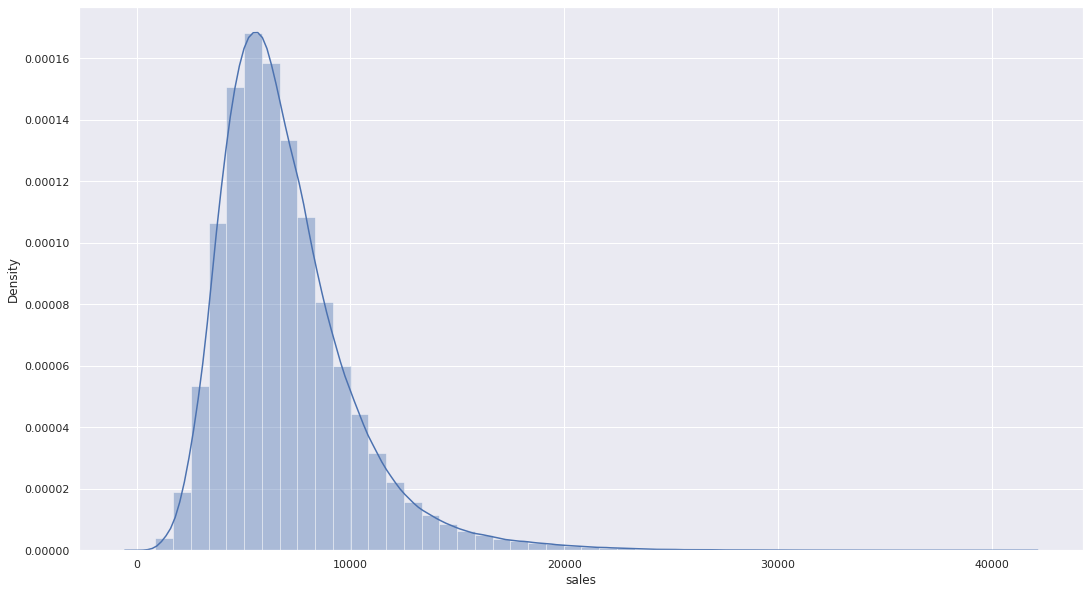

In [ ]:
sns.distplot(df4['sales']) # Sales = RESPOSTA = FENÔMENO = Objetivo que queremos modelar

Veja que a distribuição acima está bem próxima de uma distribuição normal (gaussiana). Por que se importar com isso? Porque os algoritimos de ML eles são criados em algumas premissas... por exemplo, que os dados sejam INDEPENDENTES e normalmente distribuidos (gauss). Quanto mais próximo de uma normal for sua RESPOSTA/SAÍDA/FENÔMENO, melhor seu modelo irá performar. Para isso você pode fazer algumas transformações

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


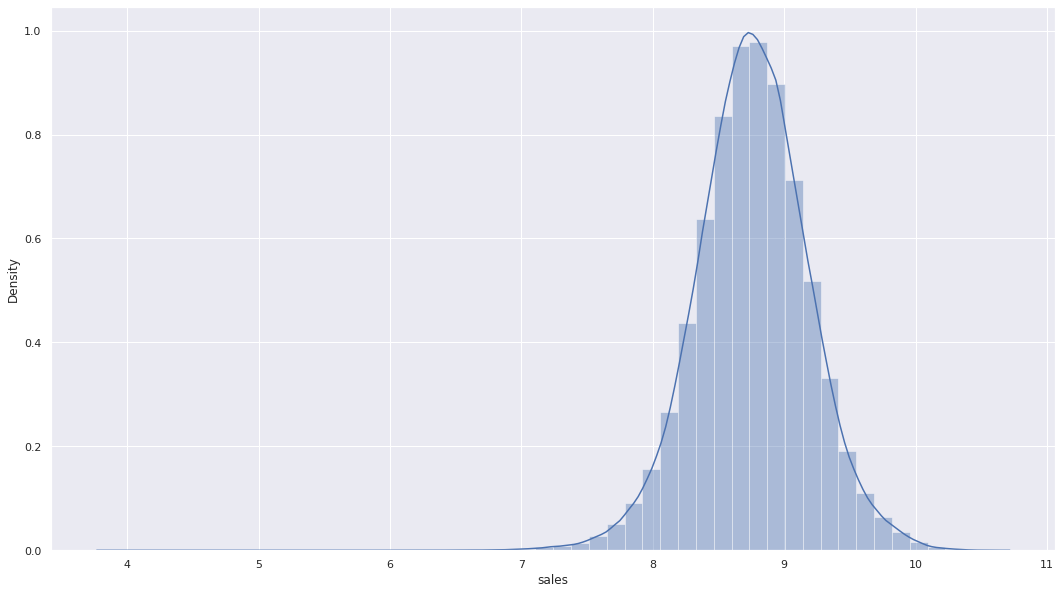

In [ ]:
# np.log1p - multiplica todos os valores de vendas por um log
sns.distplot(np.log1p(df4['sales']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


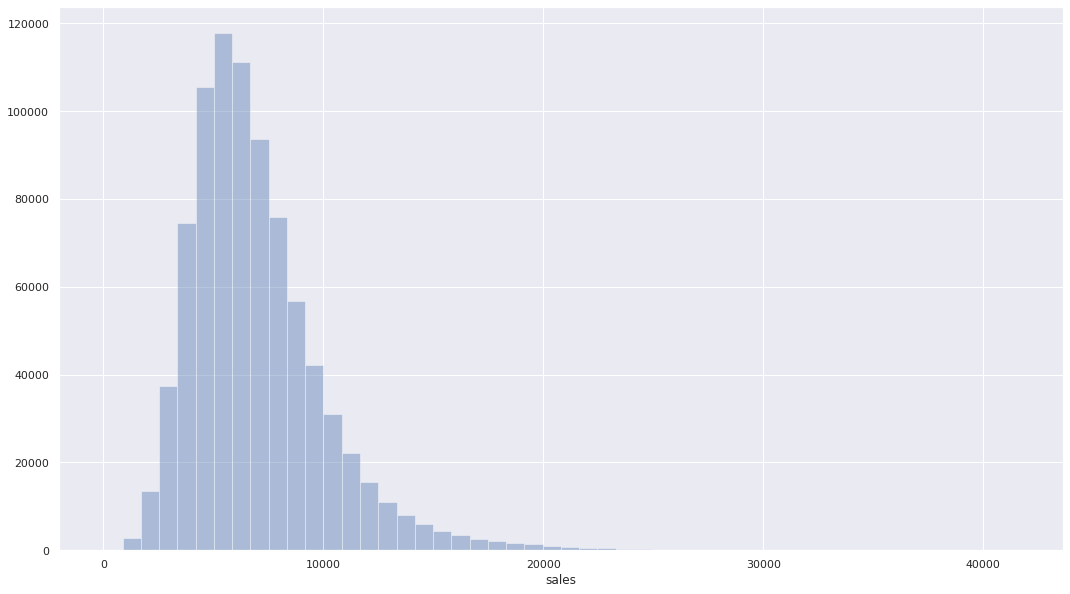

In [ ]:
sns.distplot( df4['sales'], kde = False ) # Sales = RESPOSTA = FENÔMENO = Objetivo que queremos modelar

# Aqui conseguimos ver os eixos y com os números reais

#### 4.1.2 Numerical Variable

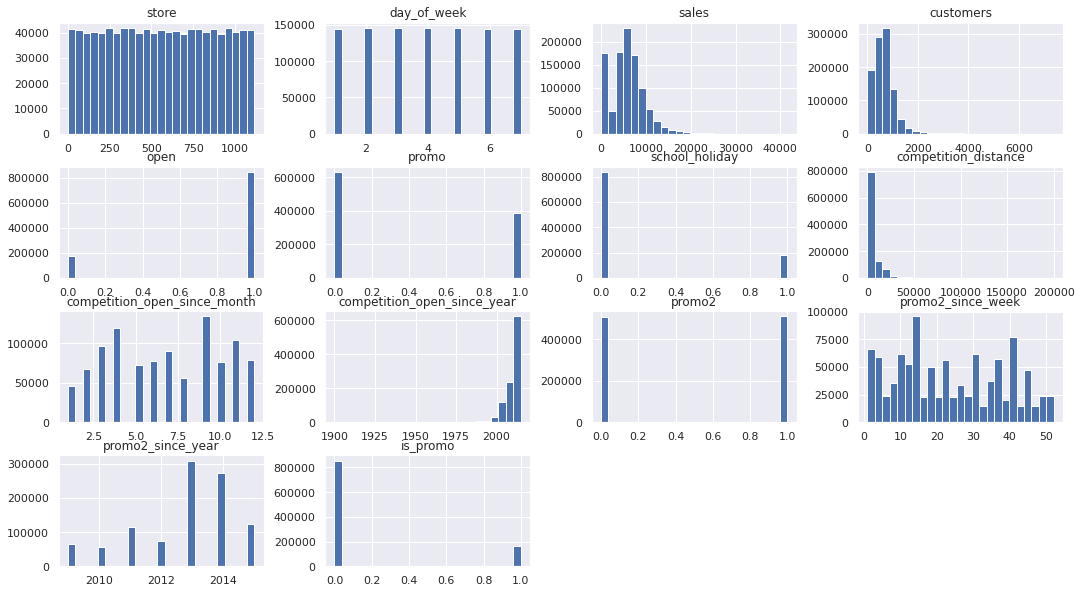

In [ ]:
num_attributes.hist(bins = 25); #  bins = São as divisões de intervalos

#### 4.1.3 Categorical Variable

In [23]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

In [24]:
df4['state_holiday'].unique()

array(['regular_day', 'public_holiday', 'easter_holiday', 'christmas'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


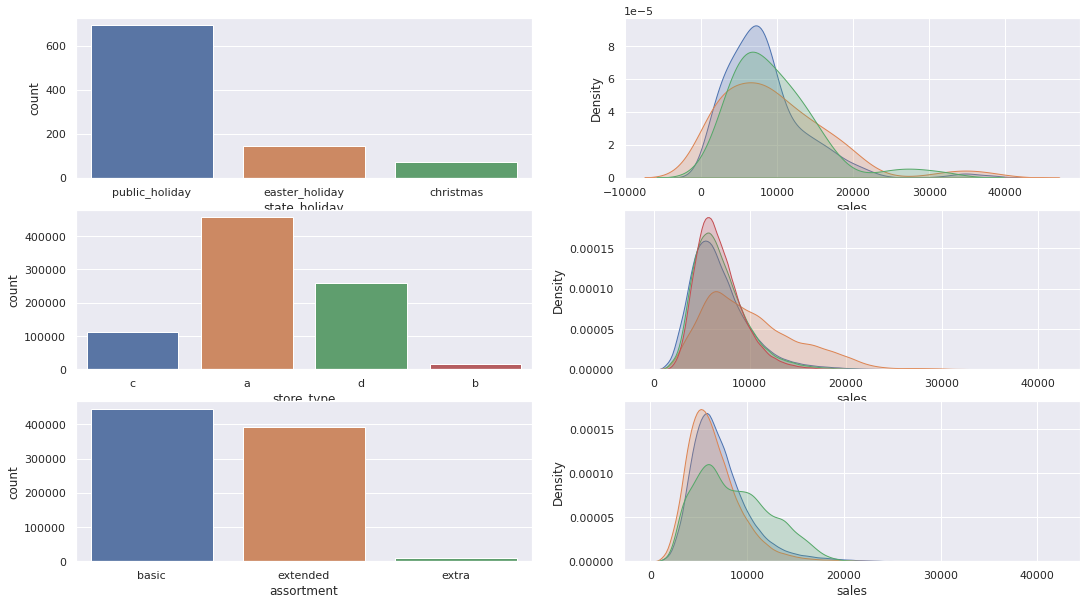

In [ ]:
# Vamos plotar CONTAGEM x DISTRIBUIÇÃO


# State_Holiday
plt.subplot( 3, 2 ,1 ) # linha,coluna,pos

a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'] )

plt.subplot( 3 , 2, 2)

sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday' , shade = True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday' , shade = True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas' , shade = True )

# Store_type
plt.subplot( 3, 2 ,3 ) # linha,coluna,pos

sns.countplot( df4['store_type'] )

plt.subplot( 3, 2 ,4 ) # linha,coluna,pos

sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label = 'a' , shade = True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label = 'b' , shade = True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label = 'c' , shade = True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label = 'd' , shade = True )

# Assortment
plt.subplot( 3, 2 ,5 ) # linha,coluna,pos

sns.countplot( df4['assortment'] )

plt.subplot( 3, 2 ,6 ) # linha,coluna,pos

sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label = 'extended' , shade = True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label = 'basic' , shade = True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label = 'extra' , shade = True )



### 4.2 Análise Bivariada


Analisa-se apenas uma variável (agente) com o resultado (fenômeno... nosso objetivo)

**funções importantes**

- **df [ ['col','col1',...] ].groupby('xxx').sum( ).reset_index( )**
- df.pivot( index = '' , columns = ' ' , values = ' ' ) + df.plot( )
- sns.barplot( )
- **sns.heatmap( df.corr( method = 'pearson'), annot = True )** <span style='color:red'> Não é possível com STRINGS </span>
- sns.scatterplot( )
- sns.regplot(x= 'day_of_week', y = 'sales', data = aux1);

**OBSERVAÇÃO**
<span style='color:blue'>**corr(method='pearson')** -> vai de -1 até 1... Ele analisa a correlação entre as variáveis da seguinte maneira, se for negativo, significa que são inversamente proporcionais, se for positivo significa que são diretamente proporcionais... se for zero, é por que não apresentam correlação, de modo geral quando mais próximo de zero menos correlação apresentam as variáveis.

#### **Hipótese 1** Lojas com sortimento maior, deveriam vender mais

<span style='color:red'>**FALSA**</span> vendem menos...

<span style = 'color:green'>**insights** => Lojas com sortimento maior, vendem menos</span>

<span style = 'color:blue'>**Relevância para o modelo** => minha visão: fraca, corr_pearson: não dá para aplicar em string </span>

In [ ]:
aux1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()
aux1

,assortment,sales
0,basic,2945750070
1,extended,2856484241
2,extra,70946312


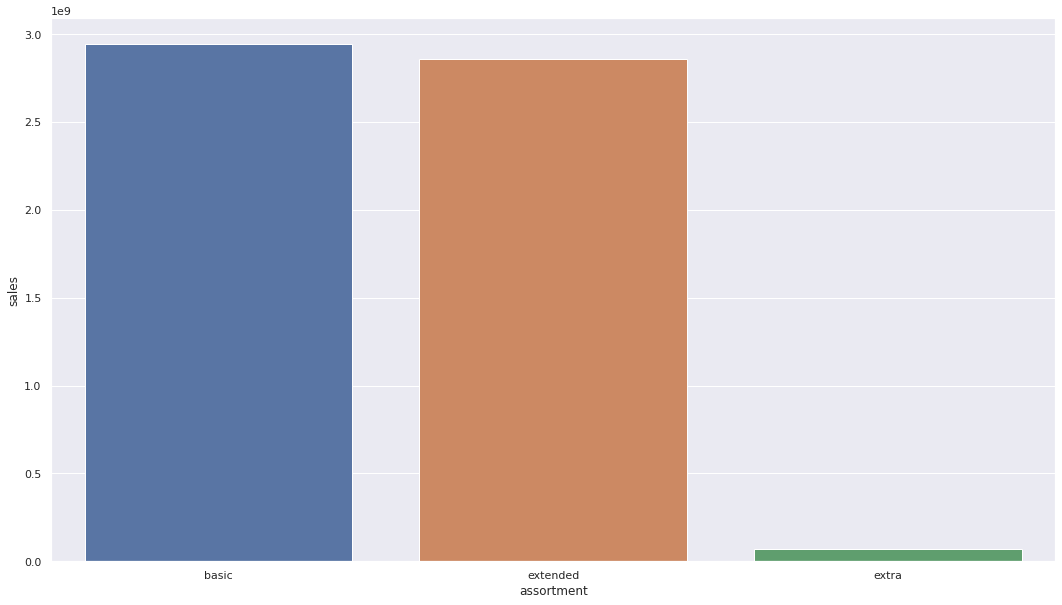

In [ ]:
sns.barplot( x = 'assortment', y = 'sales', data = aux1)

In [ ]:
aux2 = df4[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.head()

,year_week,assortment,sales
0,2013-00,basic,13434262
1,2013-00,extended,12425669
2,2013-00,extra,269404
3,2013-01,basic,26007250
4,2013-01,extended,22917693


In [ ]:
aux3 = aux2.pivot(index = 'year_week', columns ='assortment' , values ='sales' )
aux3.head()

assortment,basic,extended,extra
year_week,,,
2013-00,13434262,12425669,269404
2013-01,26007250,22917693,350279
2013-02,17970974,16029584,377207
2013-03,24392076,21243431,404662
2013-04,19972891,18130077,363061


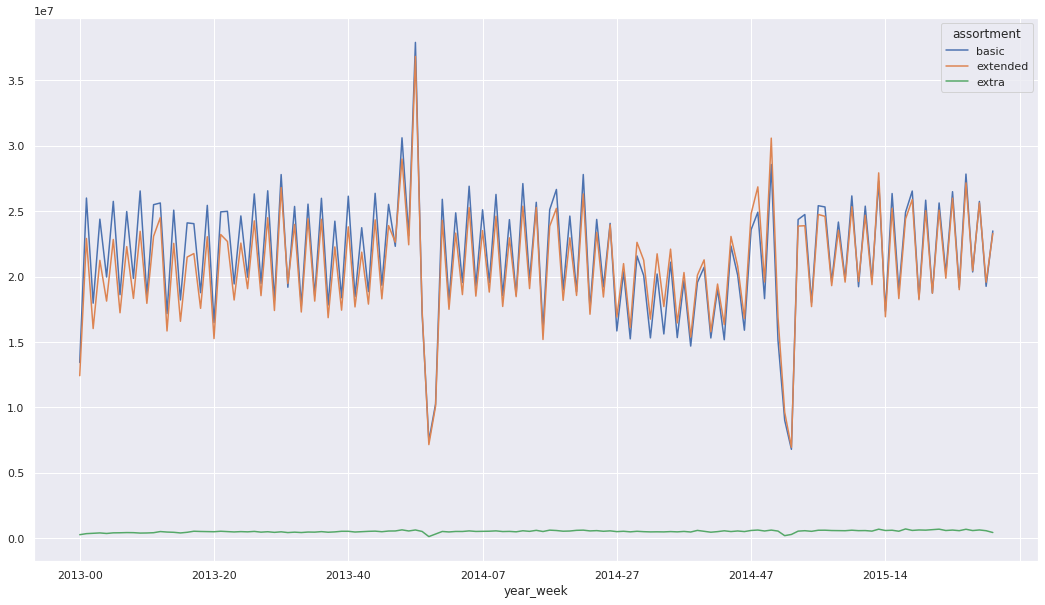

In [ ]:
aux3.plot()

Essa será uma variável importante para o modelo, pois o Extra tem um volume e comportamento muito diferentes do extended e basic.

#### **Hipótese 2** Lojas com competidores mais próximos deveriam vender menos

<span style='color:red'>**FALSA**</span> vendem mais...


<span style = 'color:green'>**insights** => Competidores próximos, vendem mais</span>

<span style = 'color:blue'>**Relevância para o modelo** => minha visão: média, corr_pearson: -0.2 </span>

In [ ]:

# criar os intervalos (bins)
bins = list(np.arange(0,20000,1000))
# preciso saber em qual grupo ele encaixa
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins = bins)
aux1.head()

,competition_distance,sales,competition_distance_binned
0,20.0,4579807,"(0, 1000]"
1,30.0,17552666,"(0, 1000]"
2,40.0,29261626,"(0, 1000]"
3,50.0,60835848,"(0, 1000]"
4,60.0,22088359,"(0, 1000]"


In [ ]:
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
aux2.head()

,competition_distance_binned,sales
0,"(0, 1000]",1832415839
1,"(1000, 2000]",918682669
2,"(2000, 3000]",610405362
3,"(3000, 4000]",378745560
4,"(4000, 5000]",325665741


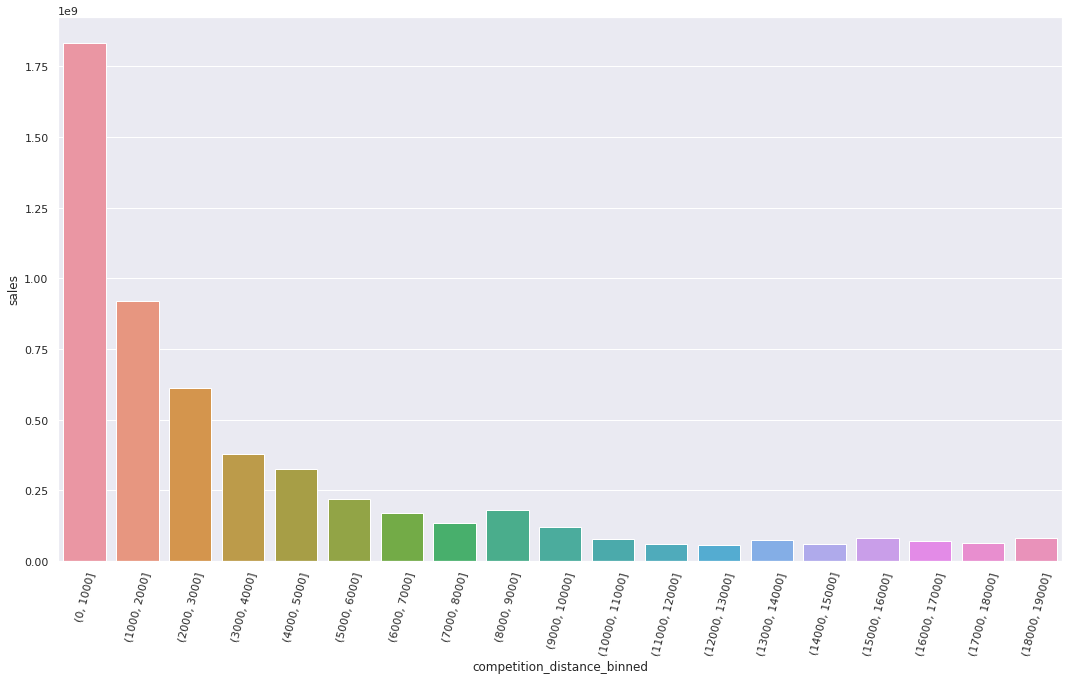

In [ ]:
grafic = sns.barplot(x='competition_distance_binned', y = 'sales', data = aux2)
plt.xticks(rotation=75);
# COMPETIDORES PRÓXIMOS PERTO VENDEM MAIS para essa empresa

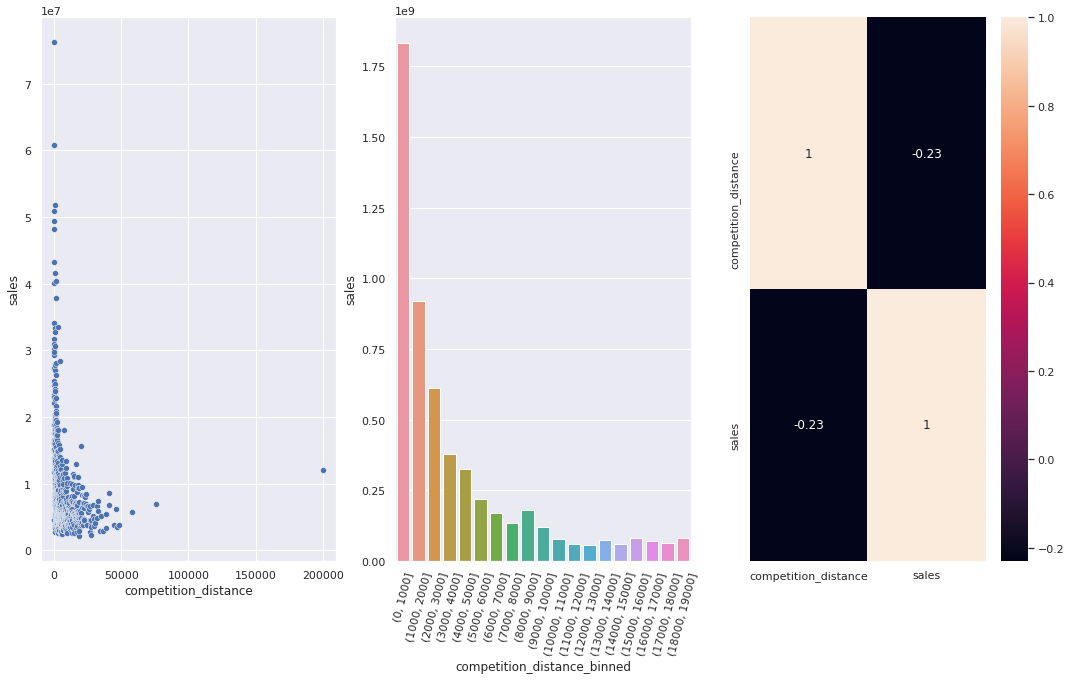

In [ ]:
plt.subplot(1,3,1)
sns.scatterplot(x='competition_distance',y='sales',data=aux1)

plt.subplot(1,3,2)
grafic = sns.barplot(x='competition_distance_binned', y = 'sales', data = aux2)
plt.xticks(rotation=75)

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot = True );

Veja o gráfico de correlação acima, Sales x Competition_Distance = -0.23... O negativo significa que temos uma razão inversamente proporcional, ou seja, quanto mais distante o concorrente está, menor a venda.

Além disso, iremos utilizar a variável Competition_distance, pois ela tem -0.23 de correlação com SALES

#### **Hipótese 3** Lojas com competidores à mais tempo deveriam vender mais 

<span style='color:red'>**FALSA**</span> vendem menos...


<span style = 'color:green'>**insights** => Competidores mais tempo, vendem menos</span>

<span style = 'color:blue'>**Relevância para o modelo** => minha visão: fraca, corr_pearson: -0.1 </span>

In [ ]:
aux1 = df4[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
aux1.tail()

,competition_time_month,sales
371,1403,153074
372,1404,155301
373,1405,154513
374,1406,158205
375,1407,38882


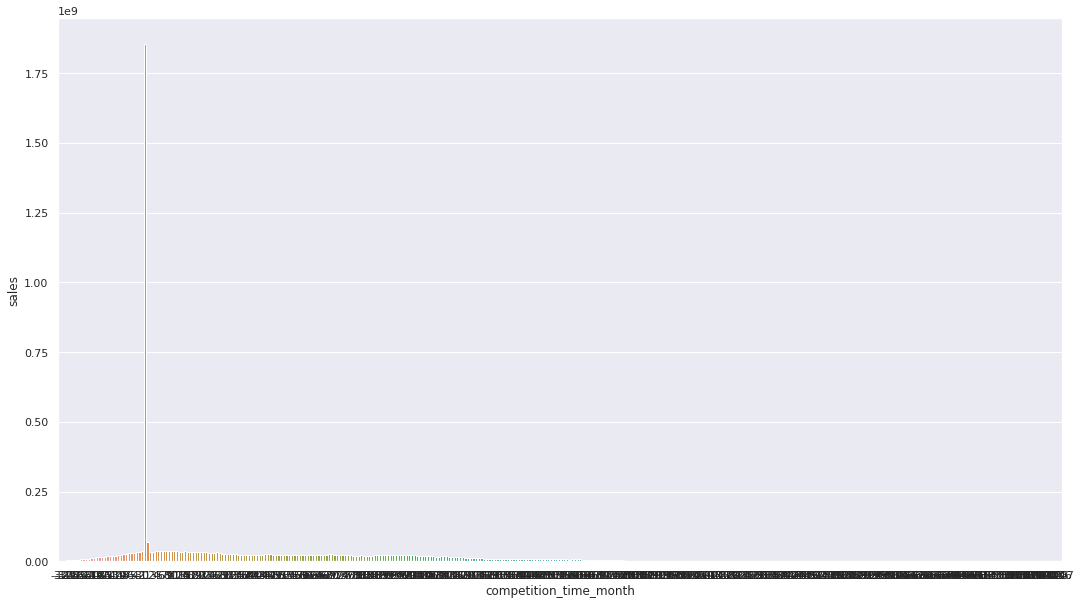

In [ ]:
sns.barplot(x=aux1['competition_time_month'], y = aux1['sales'])
# ruim de enxergar...

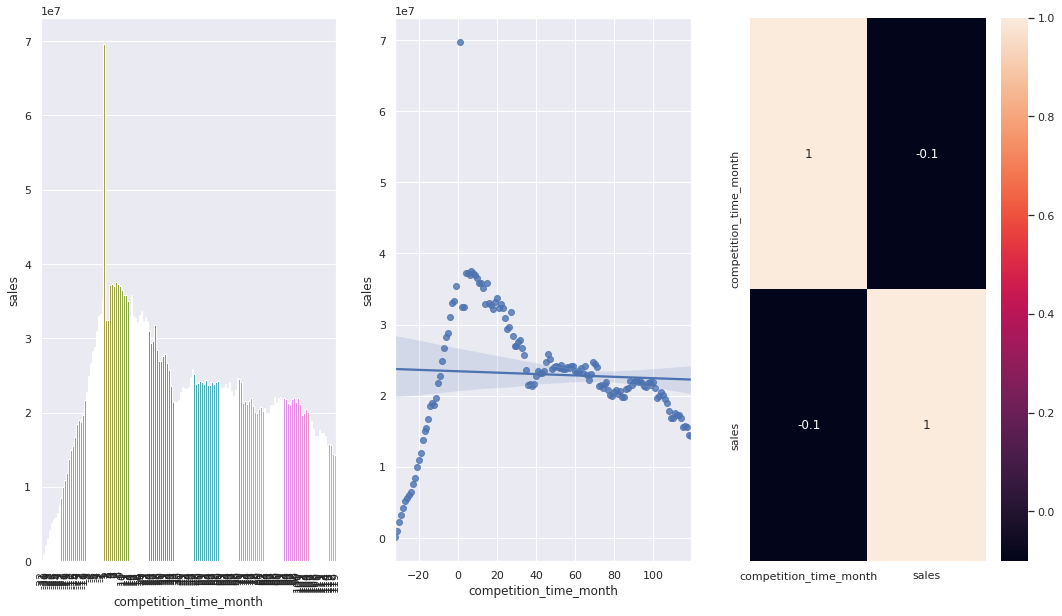

In [ ]:
plt.subplot(1,3,1)
# vamos fazer um filtro para visualizar melhor
aux2 = aux1[ (aux1['competition_time_month'] <120) & (aux1['competition_time_month'] != 0) ]
sns.barplot(x=aux2['competition_time_month'], y = aux2['sales'])
plt.xticks(rotation=90);

plt.subplot(1,3,2)
sns.regplot(x = 'competition_time_month', y = 'sales', data = aux2)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot = True)

Apresenta uma correlação muito baixa, -0.1, talvez nem seja relevante para o modelo de Sales (vamos deixar ver a opinião do algorítimo depois)

### 4.3 Análise Multivariada


Analisa-se várias variáveis ao mesmo tempo com o resultado e também analisa-se as variáveis entre sí.

**funcionamento** - Os modelos de ML tem como uma das premissas a navalha de Occam, o qual **um modelo com menos complexidade deve alcançar um aprendizado mais generelizado**. Uma das maneiras de se diminuir a complexidade de um modelo é **diminuindo o número de informações não relevantes**. Uma dessas informações não relevantes são colunas que contém **características semelhantes**. Uma solução para auxiliar a remoção das variáveis com perfil mais parecido, seria o clustermap, o qual é uma boa forma de minimizar a complexidade do modelo. Lembrando, que o Clustermap, agrupa as linhas e colunas com mais informações similares, e apartir delas cria-se clusters... o qual esses cluster começam a ser comparado com outras colunas/linhas e forma novos clusters... até chegar no último cluster.

#### 4.3.1 Numerical Attribute

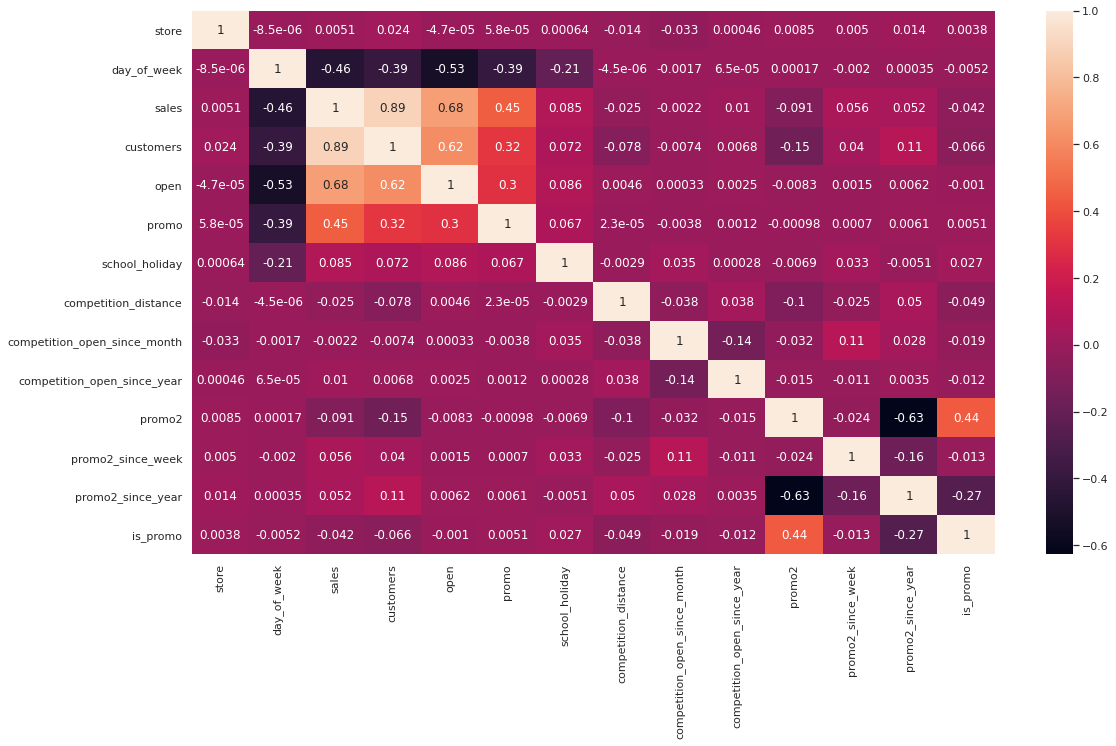

In [ ]:
correlation = num_attributes.corr()

sns.heatmap(correlation,annot=True)

Observe que a correlação de SALES e CUSTOMERS é muito alta 0.89, que indica uma alta correlação, e além disso é possitiva, que significa que quanto mais costumers na loja, mais vendas teremos. O único problema, é que não temos a quantidade de costumers nas próximas 6 semanas... então é uma variável descartada já... ( a não ser que você faça um machinea Learning para prever quantos Costumers teremos na loja nas próximas 6 semanas... e insira o valor dos customers neste projeto final)

#### 4.3.2 Categorical Attribute

O problema, é que não podemos usar a função corr() aplicando o método de pearson aqui, pois esse método não consegue ser aplicado entre atributos categóricos e entre atributos categóricos e numéricos. Logo iremos usar o método **Cramer V**. Vale lembrar que o V de Cramer vai de 0 até 1... Logo, não é igual ao pearson que correlaciona de -1 até 1.

**funções**
- df.select_dtypes(include='object')

In [ ]:
# Pegar novamente os atributos de categoria (execeto o year_week que está como OBJECT mas é data)
a = df4.select_dtypes(include='object')
a.head()

,state_holiday,store_type,assortment,year_week
0,regular_day,c,basic,2015-30
1,regular_day,a,basic,2015-30
2,regular_day,a,basic,2015-30
3,regular_day,c,extended,2015-30
4,regular_day,a,basic,2015-30


<img src = "./img/cramer_v.png">

In [ ]:
pd.crosstab(a['state_holiday'],a['store_type']) # Confuse Matriz

store_type,a,b,c,d
state_holiday,,,,
christmas,4,66,0,1
easter_holiday,36,100,0,9
public_holiday,236,285,65,108
regular_day,456766,15109,112903,258650


In [3]:
# Método Cramer V - sem correção

def cramer_v(x,y): # Sem correcao
    cm = pd.crosstab(x,y).as_matrix() # Confuse Matriz
    chi2 = ss.chi2_contingency( cm )[0] # Chi2 derivado de Pearson # cm = Confuse Matriz
    n = cm.sum()
    r, k = cm.shape
    v = np.sqrt( ( chi2 / n ) / min( k-1 , r-1 ) )
    return v

In [ ]:
cramer_v(a['state_holiday'],a['store_type'])

0.07106469715258833

<img src = "./img/cramer_v_correcao.png">

In [4]:
# Fazer correcao
def cramer_v(x,y):
    cm = pd.crosstab(x,y).as_matrix() # Confuse Matriz
    chi2 = ss.chi2_contingency( cm )[0] # Chi2 derivado de Pearson # cm = Confuse Matriz
    n = cm.sum()
    r, k = cm.shape
    
    
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)

    v = np.sqrt( ( chi2corr / n ) / min( kcorr-1 , rcorr-1 ) )
    return v


In [ ]:
cramer_v(a['state_holiday'],a['store_type'])

0.07106469715258833

In [ ]:
a1 = cramer_v(a['state_holiday'],a['state_holiday'])
a2 = cramer_v(a['state_holiday'],a['store_type'])
a3 = cramer_v(a['state_holiday'],a['assortment'])

a4 = cramer_v(a['store_type'],a['state_holiday'])
a5 = cramer_v(a['store_type'],a['store_type'])
a6 = cramer_v(a['store_type'],a['assortment'])

a7 = cramer_v(a['assortment'],a['state_holiday'])
a8 = cramer_v(a['assortment'],a['store_type'])
a9 = cramer_v(a['assortment'],a['assortment'])

d = pd.DataFrame( {
    'state_holiday': [a1,a2,a3],
    'store_type': [a4,a5,a6],
    'assortment': [a7,a8,a9]
})

d

,state_holiday,store_type,assortment
0,1.000002,0.071065,0.067546
1,0.071065,1.000002,0.538457
2,0.067546,0.538457,1.000001


In [ ]:
d = d.set_index(d.columns)
d

,state_holiday,store_type,assortment
state_holiday,1.000002,0.071065,0.067546
store_type,0.071065,1.000002,0.538457
assortment,0.067546,0.538457,1.000001


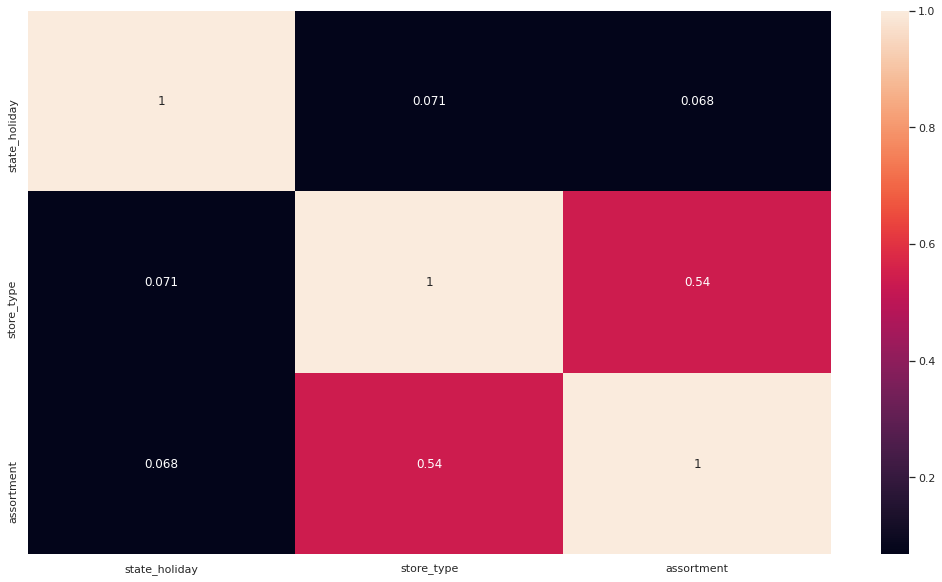

In [ ]:
# Agora finalmente podemos fazer o gráfico de
# correlaçao com o heatmap

sns.heatmap(d,annot=True)

# <span style='color:blue'>Modelagem dos Dados

## Passo 5 - Preparar os Dados (TRANSFORMAÇÕES)

In [25]:
df5 = df4.copy()

**Três tipos de preparação dos dados**

**Normalização**
- Rescala o centro para 0 com desvio-padrão igual a 1. (modo geral, maior valor vale 1 e o resto é a razão dele)
- Utilizada para <span style='color:blue'>distribuições Normais (gaussiana)

**Rescaling**
- Rescala para o intervalo entre 0 e 1
- útil para distribuições <span style='color:red'> NÃO Gaussianas (Normal)

  
~**Transformação de Grandeza e Natureza**~ 

~A trasnformação de grandeza tem como objetivo trazer a sua variável resposta mais próximo possível de uma Gaussiana/Normal. A transformação de Natureza tem como objetivo trazer a natureza real dos seus dados. Exemplo de transformação de grandeza, os algorítims de ML foram criados em cima de algumas premissas, uma delas é que as dados apresentem uma distribuição normal, sendo assim, quanto mais próximo de uma normal, melhor será a accuracy do seu modelo.~
    
**Encoding**
- Conversão de Features **categóricas para numérica**

**Transformação Cíclica**
- Ele pega características cíclicas e passa isso para o modelo (exemplo: 12 meses dentro de 1 ano... veja que 12 meses é ciclico). Logo, JAN está longe de DEZ do mesmo ano, mas no ano posterior DEZ está próximo de JAN, então ela tenta equilibrar essa diferença.


**OBSERVAÇÃO**
- Encode -> Fazer variáveis categóricas virarem NÚMEROS

- Normalização da escala -> é necessário normalizar a escala, pois os modelos tendem a dar mais importância para variáveis com ranges maiores.

### 5.1 Normalização

Não temos distribuição com aspecto gaussiano para aplicar

### 5.2 Rescaling

**Min-Max Scaler**

$\Large x_{new} = \frac{x_{i}- \mu}{x_{max}-x_{min}}$

Grande problema de se aplicar essa transformação é na presença de <span style='color:red'> OUTLIERS </span>, pois ela colocar os valores muito próximo de ZERO.

**Robust Scaler**

$\Large x_{new} = \frac{x_{i}- Q_{1}(x)}{ Q_{3}(x)-  Q_{1}(x)}$

Aplicando esta transformação, o problema dos <span style='color:red'> OUTLIERS </span>não irão interferir mais, pois você se baseia na diferença entre os (quartis) Q1 e Q3... que é onde estão a maior concentração de valores

In [ ]:
# Variáveis Não cíclicas

# Competition Distance
# year
# competition time month
# promo time week

**Métodologia de escolha**

<span style='color:green'> Agora eu irei definir quais transformações utilizar, **se tiver outliers... uso a Robust Scaler**, caso contrário, **irei utilizar a Min-Max Scaler**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


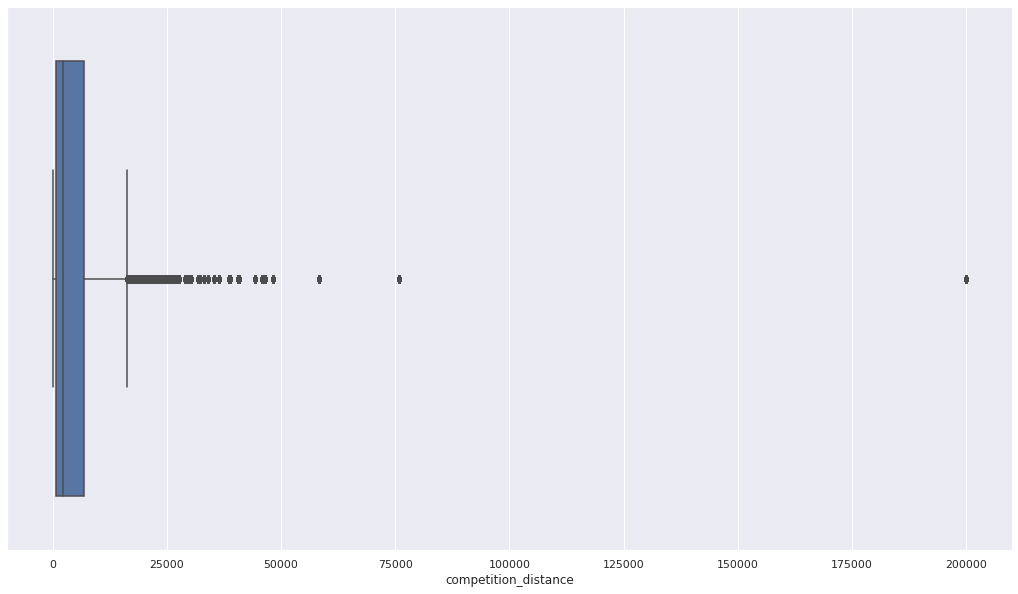

In [ ]:
sns.boxplot(df5['competition_distance'])

# TEM OUTLIEARs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


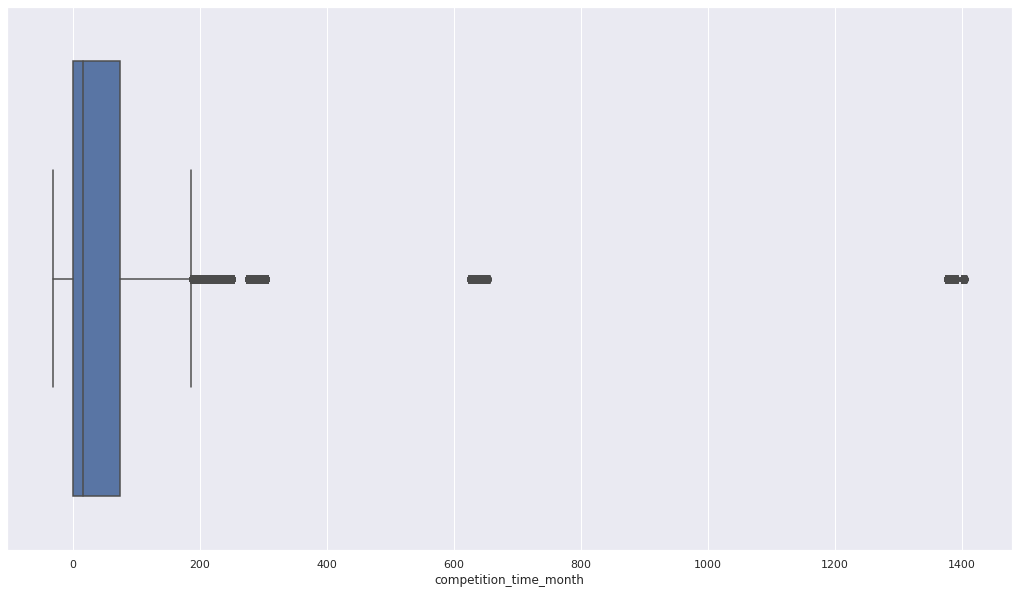

In [ ]:
sns.boxplot(df5['competition_time_month'])

# TEM OUTLIEARs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


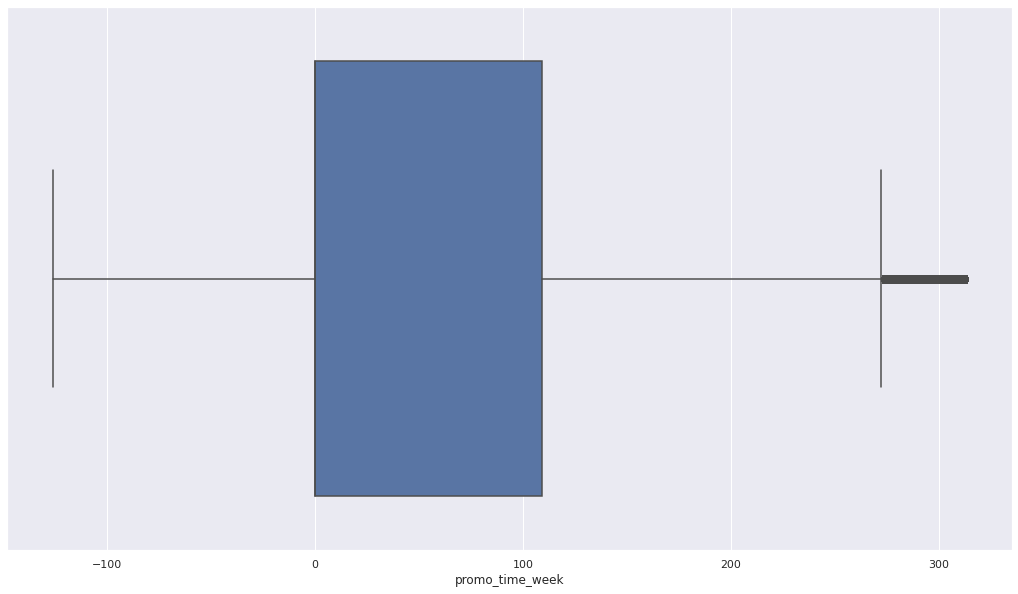

In [ ]:
sns.boxplot(df5['promo_time_week'])

# Os OUTLIEARs NÃO são relevantes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


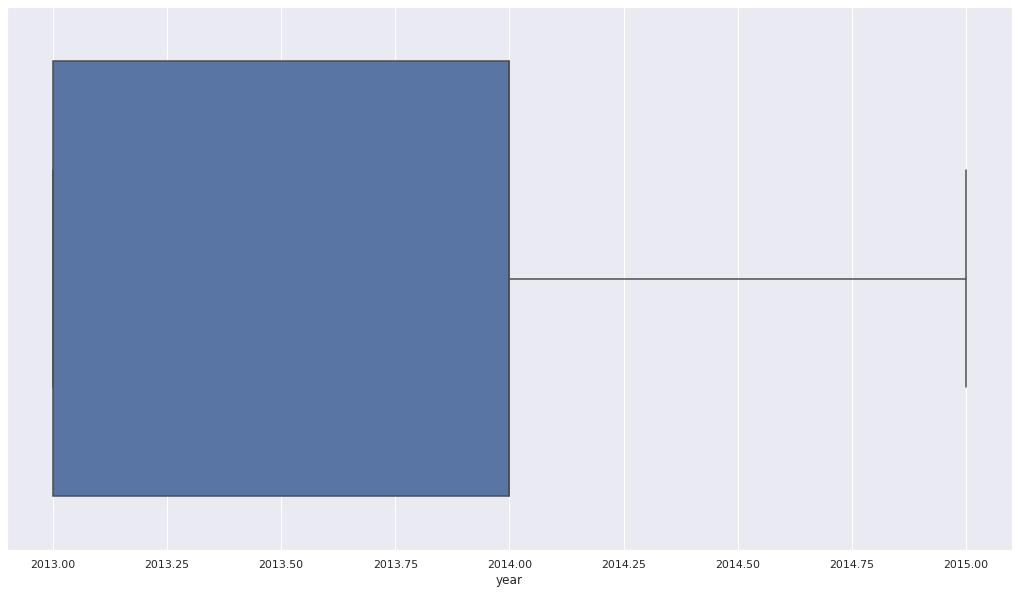

In [ ]:
sns.boxplot(df5['year'])
# Os OUTLIEARs NÃO são relevantes

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [27]:
# Variáveis Não cíclicas
rs = RobustScaler()
mms = MinMaxScaler()
# Competition Distance (Robust Scaler)
df5['competition_distance']= rs.fit_transform( df5[['competition_distance']].values )
# salvar
pickle.dump( rs, open('parameter/competition_distance_scaler.pkl','wb'))

# competition time month (Robust Scaler)
df5['competition_time_month']= rs.fit_transform( df5[['competition_time_month']].values )
# salvar
pickle.dump( rs, open('parameter/competition_time_month_scaler.pkl','wb'))

# promo time week (MinMaxScaler)
df5['promo_time_week']= mms.fit_transform( df5[['promo_time_week']].values )
# salvar
pickle.dump( mms, open('parameter/promo_time_week_scaler.pkl','wb'))

# year
df5['year']= mms.fit_transform( df5[['year']].values )
# salvar
pickle.dump( mms, open('parameter/year_scaler.pkl','wb'))



In [ ]:
# Veja como ele escalou os anos... 1; 0.5; 0
pd.unique(df5['year']) # temos só 3 anos

array([1. , 0.5, 0. ])

In [ ]:
df5[['competition_distance','competition_time_month','promo_time_week','year']].sample(5)


,competition_distance,competition_time_month,promo_time_week,year
489038,-0.008065,-0.216216,0.419134,0.5
128389,0.224194,1.418919,0.886105,1.0
955737,-0.183871,-0.216216,0.287016,0.0
395192,0.000000,-0.256757,0.669704,0.5
324238,0.229032,1.905405,0.774487,0.5


### 5.3 Encoding 

**TIPOS DE ENCODING**

Existem mais de 10 tipos de encodings para variáveis categóricas. Qual utilizar? Somente com um bom feeling você saberá qual usar. Vamos analisar um por um dos mais utilizados.

#### One Hot Encoding

<img src = './img/one_hot_encoding.png'>

Grande problema é que ele cria muitas colunas quando você tem muitos níveis de categoria... Isso bate de frento com o que discutimos anteriormente sobre a Navalha de Occam (quanto mais colunas, mais complexo, menor a generalização em ML)

Quando utilizar: Variáveis categóricas que representam ESTADO, exemplo: Aberto/Fechado , dia normal / Feriado ....

#### Label Encoding

<img src = './img/label_encoding.png'>

Troca os tipos das variáveis categóricas por números.

Quando funciona bem: Quando você tem variáveis que são nomes, algo que não tem uma relação... exemplo: nomes

#### Ordinal Encoding

<img src = './img/ordinal_encoding.png'>

É muito utilizado quando você tem relação de ordem de maior pro menor ou algo do tipo (exemplo temperatura).Por exemplo, cores, é algo que não precisamos utilizar o Ordinal... pois não há ORDEM ... neste caso das cores poderia utilizar Label Encoding, pois ele é apenas para transformar os nomes em números sem qualquer relação

#### Target Encoding

<img src = './img/target_encoding.png'>

O nome Target surgiu pois ele leva em consideração a variável resposta (neste caso vendas). Exemplo com a temperatura, se sua loja vendeu mais em dias Hot, então ele terá um valor maior do que para dias Cold.

#### Frequency Encoding

<img src = './img/frequency_encoding.png'>

Muito parecido com o Target, mas neste caso, ele encontra esses valores por contagens de ocorrências. Exemplo: Marca de carros

#### Embedding Encoding

<img src = './img/embedding_encoding.png'>

Muito utilizado em NLP ( neuro-linguistic Programming)

#### 5.3.1 Aplicando o  Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [28]:
# state_holiday - One hot Encoding
df5 = pd.get_dummies(df5,prefix=['state_holiday'],columns=['state_holiday'])

# store_type - Label Encoding (vamos trocar apenas as letras por números, pois não há uma ordem de grandeza)
le = LabelEncoder()
df5['store_type']= le.fit_transform(df5['store_type'])
# salvar
pickle.dump( le, open('parameter/store_type_scaler.pkl','wb'))


# assortment - Ordinak Encoding ( existem uma ordem de grandeza agora, basic < extra < extended )
assortment_dict = {'basic':1,'extra':2, 'extended':3} 
df5['assortment'] = df5['assortment'].map(assortment_dict)

### 5.4 Transformação da Variável <span style='color:red'> Resposta (Sales)

Objetivo de Todas as transformações: Tenta trazer distribuições que apresentam um skew mais a direita ou esquerda, mais próximo de uma normal.

**logarithm Transformation** -Aplicar o Log em todas as variáveis resposta.

**Box-Cox Transformation** - (Formula)

**Cube-Root Transformation** - Extrair a raiz cúbica de todos os valores.

**Square-Root Transformation** - Extrair a raiz quadrada de todos os valores.

**Sine and Cosine Transformation** - ... seno e cosseno.


#### 5.4.1 Logarithm Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


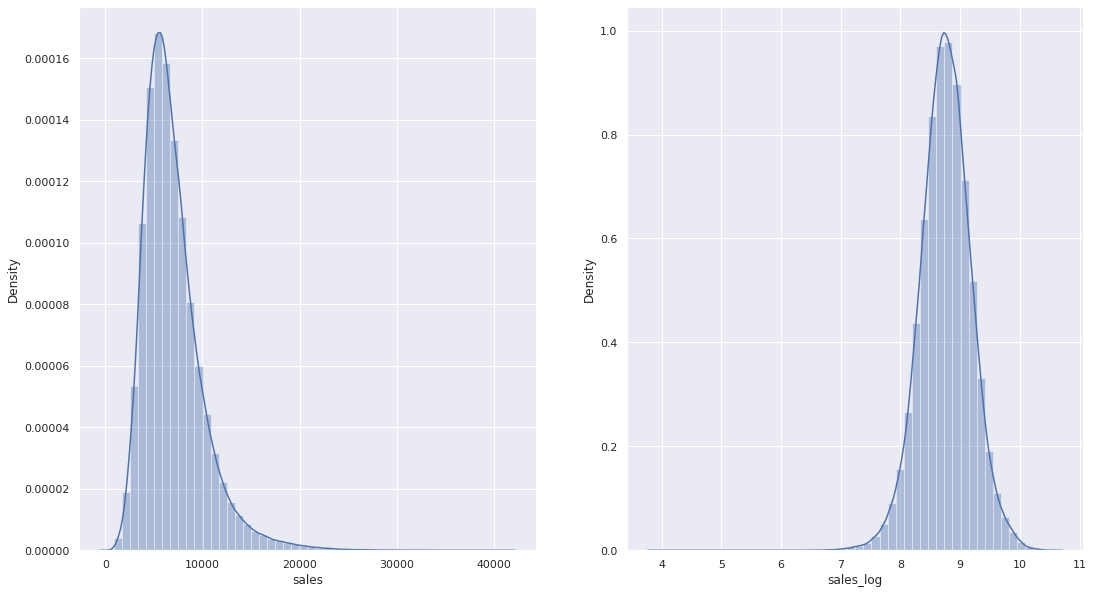

In [ ]:
# Distribuição das vendas antes da transformação
plt.subplot(1,2,1)
sns.distplot(df5['sales'])

# aplicando a transformação Log
plt.subplot(1,2,2)
df5['sales_log'] = np.log1p(df5['sales'])
sns.distplot(df5['sales_log'])



#### 5.4.2 Box-Cox Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


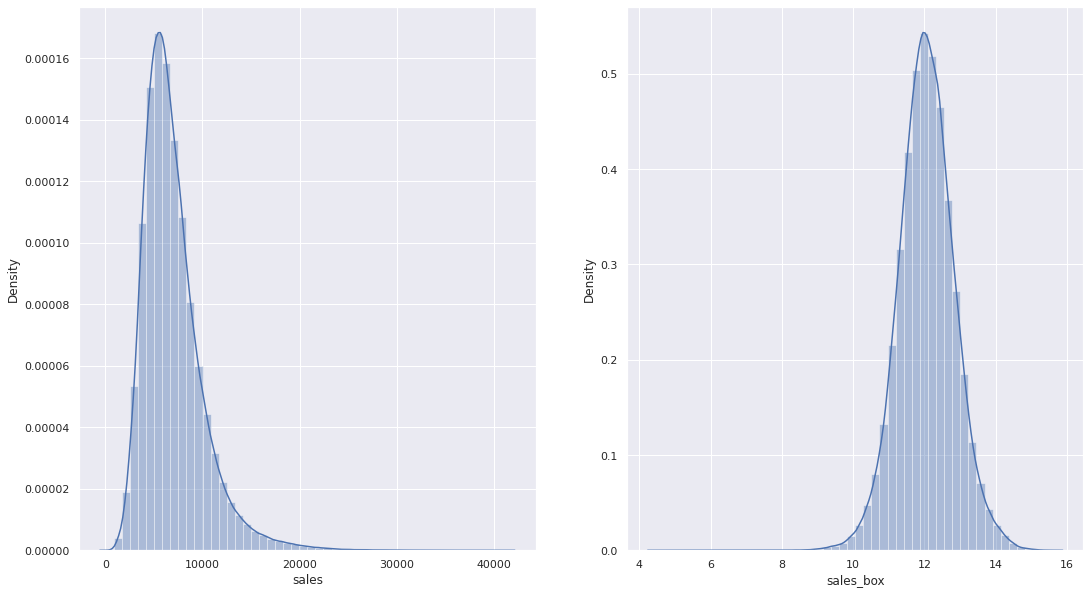

In [ ]:
# Distribuição das vendas antes da transformação
plt.subplot(1,2,1)
sns.distplot(df5['sales'])

# aplicando a transformação Box Cox
plt.subplot(1,2,2)
df5['sales_box'] = ss.boxcox(df5['sales'])[0]
sns.distplot(df5['sales_box'])



#### 5.4.3 Square-Root Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


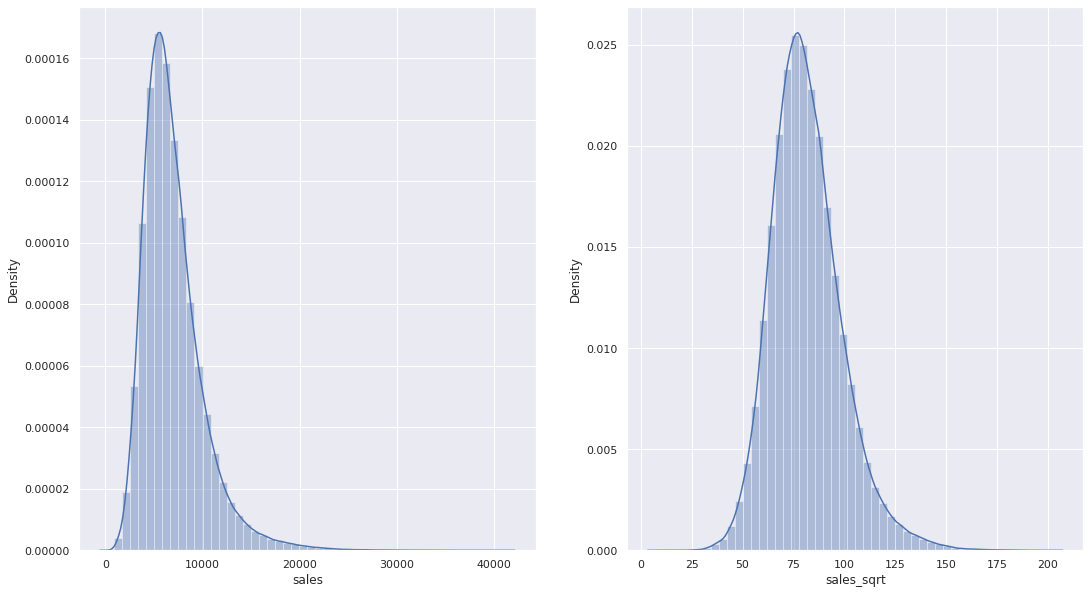

In [ ]:
# Distribuição das vendas antes da transformação
plt.subplot(1,2,1)
sns.distplot(df5['sales'])

# aplicando a transformação Square-Root
plt.subplot(1,2,2)
df5['sales_sqrt'] = np.sqrt(df5['sales'])
sns.distplot(df5['sales_sqrt'])

#### 5.4.4 Qual se aproxima mais de uma normal? Escolha

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

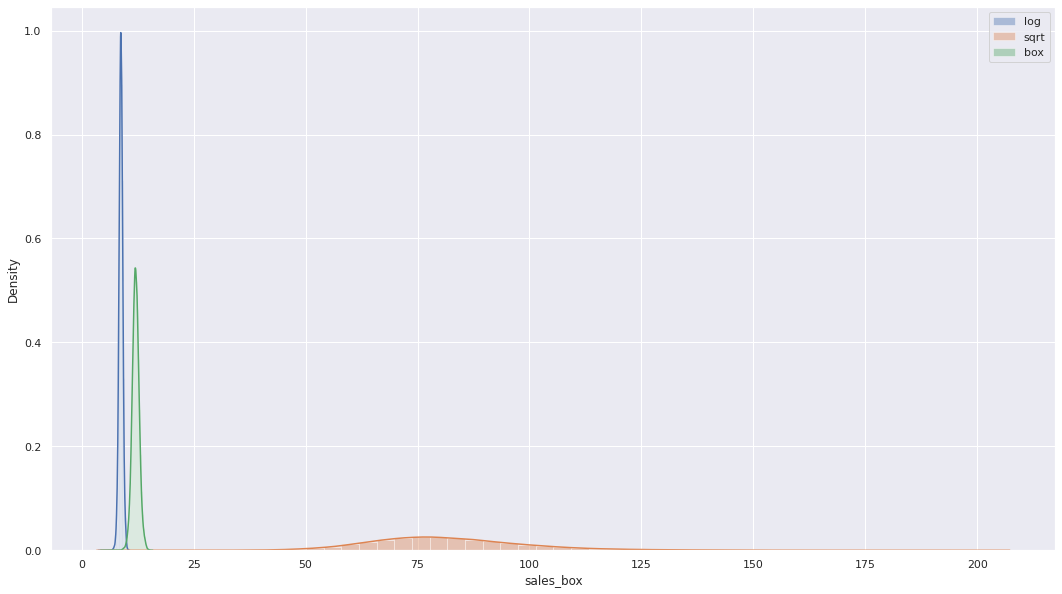

In [ ]:
# Compare
sns.distplot(df5['sales_log'],label = 'log')
sns.distplot(df5['sales_sqrt'], label= 'sqrt')
sns.distplot(df5['sales_box'], label= 'box')
plt.legend()

In [ ]:
# Parece que a Box-Cox foi a mais próxima, mas iremos usar a sales log, para ficar igual ao do professor.
df5.drop(['sales_log','sales_sqrt','sales_box'],axis=1,inplace=True)

# usaremos
df5['sales'] = np.log1p(df5['sales'])

df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,8.568646,1,1,2,1,-0.170968,9,2008,0,31,2015,0,1.0,7,31,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1
1,2,5,2015-07-31,8.710290,1,1,0,1,-0.283871,11,2007,1,13,2010,1,1.0,7,31,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1
2,3,5,2015-07-31,9.025816,1,1,0,1,1.903226,12,2006,1,14,2011,1,1.0,7,31,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1
3,4,5,2015-07-31,9.546527,1,1,2,3,-0.275806,9,2009,0,31,2015,0,1.0,7,31,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1
4,5,5,2015-07-31,8.481151,1,1,0,1,4.448387,4,2015,0,31,2015,0,1.0,7,31,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1


### 5.4 Cyclical Nature Transformation 

In [ ]:
# Variáveis Cíclicas

# year (não é cíclica)
# month
# day
# week of year
# day of week

**Como Funciona?** é bem simples, basicamente ele transforma uma coluna em duas colunas, aplicando um conceito de senos e cossenos para um vetor posição

<img src='https://github.com/miguelzeph/curso_ds_em_producao/blob/master/img/cyclical_nature_transformation.png?raw=1'>

In [ ]:
# Variáveis Cíclicas


# month
df5['month_sin'] = df5['month'].apply(lambda x: np.sin(x*(2*np.pi/12)))
df5['month_cos'] = df5['month'].apply(lambda x: np.cos(x*(2*np.pi/12)))
# day
df5['day_sin'] = df5['day'].apply(lambda x: np.sin(x*(2*np.pi/30)))
df5['day_cos'] = df5['day'].apply(lambda x: np.cos(x*(2*np.pi/30)))
# week of year
df5['week_of_year_sin'] = df5['week_of_year'].apply(lambda x: np.sin(x*(2*np.pi/52)))
df5['week_of_year_cos'] = df5['week_of_year'].apply(lambda x: np.cos(x*(2*np.pi/52)))
# day of week
df5['day_of_week_sin'] = df5['day_of_week'].apply(lambda x: np.sin(x*(2*np.pi/7)))
df5['day_of_week_cos'] = df5['day_of_week'].apply(lambda x: np.cos(x*(2*np.pi/7)))

In [ ]:
df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day,month_sin,month_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos,day_of_week_sin,day_of_week_cos
0,1,5,2015-07-31,8.568646,1,1,2,1,-0.170968,9,2008,0,31,2015,0,1.0,7,31,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
1,2,5,2015-07-31,8.710290,1,1,0,1,-0.283871,11,2007,1,13,2010,1,1.0,7,31,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
2,3,5,2015-07-31,9.025816,1,1,0,1,1.903226,12,2006,1,14,2011,1,1.0,7,31,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
3,4,5,2015-07-31,9.546527,1,1,2,3,-0.275806,9,2009,0,31,2015,0,1.0,7,31,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
4,5,5,2015-07-31,8.481151,1,1,0,1,4.448387,4,2015,0,31,2015,0,1.0,7,31,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521


## Passo 6 - Feature Selection (seleção das variáveis)

In [ ]:
df6 = df5.copy()

**Feature** - São as características que os modelos de ML (próximo capítulo) utilizam para **aprender**


Occam's Razor - A explicação mais simples sobre um fenômeno observado, deveria prevalecer sobre explicações mais complexas (**Princípio da Navalha de Occam**)

De modo geral, quando mais simples for seu modelo, mais generalista ele será, quando mais informações (colunas), mais você especifica seu modelo para problemas específicos.

Tente sempre **remover** as variáveis colineares, que são variáveis que explicam a mesma coisa, pois lembre-se do princípio da navalha de Occam, quanto menos variáveis, mais simples, logo remova as v. colineares sempre.

**Os 3 métodos de Seleção de Variáveis**

- <span style='color:blue'>**Seleção Univariada (Filter Methods)**

**vantagens**

Método Simples, Método Rápido,Fácil Entendimento

**desvantagens**

Não considera a influência **entre** as variáveis (você corre o risco de excluir variáveis importantes quando combinadas com outras).


-  <span style='color:blue'>**Seleção por Importância / Método Embutido (Embedded Methods)**

**Random Forest** (classificação ou Regressão), **Lasso Regression**, **Ridge Regression**:
   
-  <span style='color:blue'>**Seleção por Subset ( Wrapper Methods)**
    
Ele testa as variáveis uma a uma e combinada, se aumentar a accuracy, ele deixa, se permanecer a mesma ou diminuir ele exclui

<img src = './img/wrapper_method.png' width = '40%'>

### 6.1 Split dataframe into training and teste dataset

Atenção, diferente de outras predições, que você faz o Split e deixa a máquina pegar de forma aleatória os dados de treino e de teste, aqui não poderemos fazer assim, pois estamos trabalhando com uma **linha temporal** onde temos que prever os dados 6 semanas à frente. Se você deixar a máquina pegar os dados no futuro, ela nao estará teoricamente sendo testada, e você não poderá validar seu modelo, pois teremos um overfit do seu modelo... Então os dados de treino serão todos antes das 6 semanas... e os de testes serão todos após as 6 semanas finais.

Acompanhe abaixo o raciocínio para pegar as últimas 6 semanas de dados do nosso dataset

**Resumo:**

dados_treino: primeiro dia de venda ..... até o dia das últimas 6 semanas

dados_teste: as últimas 6 semanas

exemplo: tenho 46 semanas... meus treino: 40 semanas... teste: 6 semanas finais

In [ ]:
# Data de Início
df6[['store','date']].groupby('store').min().reset_index().head()

,store,date
0,1,2013-01-02
1,2,2013-01-02
2,3,2013-01-02
3,4,2013-01-02
4,5,2013-01-02


In [ ]:
# Data de final
df6[['store','date']].groupby('store').max().reset_index().head()

,store,date
0,1,2015-07-31
1,2,2015-07-31
2,3,2015-07-31
3,4,2015-07-31
4,5,2015-07-31


In [ ]:
# Vamos pegar 6 semanas dessa última data
# para isso vamos usar o timedelta, ele subtrai dias da sua data (muito útil)
df6[['store','date']].groupby('store').max().reset_index()['date'][0] - datetime.timedelta(days=6*7)

# portanto, a data que começa as últimas 6 semanas no nosso dataset é 19/06/2015

Timestamp('2015-06-19 00:00:00')

In [ ]:
# Training dataset
X_train = df6[df6['date'] < '2015-06-19']
y_train = X_train['sales']
# Test dataset
X_test = df6[df6['date'] >= '2015-06-19']
y_test = X_test['sales']

print(f'Training Min Date: { X_train["date"].min() }')
print(f'Training Max Date: { X_train["date"].max() }')

print(f'Test Min Date: { X_test["date"].min() }')
print(f'Test Max Date: { X_test["date"].max() }')


Training Min Date: 2013-01-01 00:00:00
Training Max Date: 2015-06-18 00:00:00
Test Min Date: 2015-06-19 00:00:00
Test Max Date: 2015-07-31 00:00:00


### 6.2 Algorístimo Boruta

In [ ]:
from boruta import BorutaPy # !pip3.6 install boruta
from sklearn.ensemble import RandomForestRegressor

In [ ]:

X_train_n = X_train.drop(['date','sales'],axis=1).values
y_train_n = y_train.values.ravel() # ravel() coloca tudo dentro de um vetor

rf = RandomForestRegressor(
    n_jobs=-1, # para ir mais rápido
)

boruta = BorutaPy(
    estimator= rf, # modelo (iremos usar o RandomForest)
    n_estimators='auto', # número de ramificações
    verbose= 2, # print na tela
    random_state= 42, # Para que ele parta sempre do msm início (pode ser qualquer número)
).fit(X_train_n,y_train_n)


#### 6.2.1 Best Features from Boruta

In [ ]:

# Rank de relevância das Variáveis
cols_selected = boruta.support_.tolist()

X_train_fs = x_train.drop(['date','sales'], axis=1)

cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.to_list()


cols_not_selected_boruta = list( np.setdiff1d( X_train_fs.columns, cols_selected_boruta ) )


In [ ]:
# Variáveis classificadas como úteis pelo Boruta
cols_selected_boruta

In [ ]:
# Variáveis classificadas como ruins pelo Boruta
cols_not_selected_boruta

<img src = './img/boruta.png'>

In [ ]:
# nossas variáveis analisadas no Cap 4
"""
assortment: baixa
competidores proximos: baixa
promo: baixa
promo2: baixa
natal/feriado: ....
year: alta
mes: alta
dia: alta
feriado_escolar: média
""";

**O que fazer quando sua análise das variáveis não bate com o Boruta?**

1 - Usar apenas as variáveis que o Boruta classificou como Ok

2 - Usar as suas variáveis que você definiu importante no passo 4

3 - Fazer uma mescla do que você acha importante com o Boruta 


Dica: Como estamos utilizando o Método CRISP-DS, podemos escolher uma das alternativas
acima e testar... caso fique ruim a accuracia do modelo, vc testa outra opção


In [7]:

 # Copiei e Colei do resultado do Boruta, para não ter que rodar ele toda vez
cols_selected_boruta = [
 'store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'competition_time_month',
 'promo_time_week',
 'month_cos',
 'day_sin',
 'day_cos',
 'week_of_year_cos',
 'day_of_week_sin',
 'day_of_week_cos'
 ]
# Vamos colocar algumas informações que o Boruta deixou de fora (essas são necessárias)
ext = [
    'month_sin',
    'week_of_year_sin',
    #'date',
    #'sales'
]

# Final features
cols_selected_boruta.extend( ext )

In [ ]:
cols_selected_boruta

['store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'competition_time_month',
 'promo_time_week',
 'month_cos',
 'day_sin',
 'day_cos',
 'week_of_year_cos',
 'day_of_week_sin',
 'day_of_week_cos',
 'month_sin',
 'week_of_year_sin']

# <span style='color:blue'>Machine Leaning

Agora que selecionamos as **features**, podemos utilizá-las para que os modelos aprendam.

## Passo 7 - Modelos de ML

Temos basicamente 3 classificação de modelos de Machine Learning:
- Aprendizagem **Supervisionada**
- Aprendizagem **Semi-Supervisionada (reinforcement Learning)**
- Aprendizagem **Não-Supervisionada**

<span style= 'color:green'> Aprendizado **Supervisionada** </span> - Você tem uma resposta certa para a máquina tirar como parâmetro seus erros e acertos

- Tarefa de **Classificação**: Saída é um valor **discreto** (string)

ex: classificar doenças, objetos, animais, fraudes


- Tarefa de **Regressão**: Saída é um valor **contínuo** (numérico)

você informa as **features** e também a **saída**

ex: prever quanto um carro custaria ( você passa todas as características do carro + o valor real )

ex: prever a temperatura em outra escala

ex: Valor de venda de casa / terrenos ( Você passa o metro quadrado, informações da localização, etc ...)

- Tarefa de **predições**: Séries **temporais**

ex: Quanto sua loja irá faturar daqui 2 semanas


<span style= 'color:green'> Aprendizado **Não Supervisionado** </span>- Você não tem resposta certa, voce tenta agrupar objetos dentro da sua similiaridade

- Agrupamento

- Clusterização

<span style= 'color:green'> Aprendizado **semi-supervisionado (reinforcement learning)** </span> - Aprende durante a execução

O **agente** gera uma **ação** no **ambiente**, o **ambiente** responde a essa **ação** com uma mudança de **estado** e também uma **recompensa**

obs: Não precisa de uma base de dados, você vai pontuando e ganhando recompensas por ações...

<span style='color:green'>deep learning </span> - é um problema de classificação SUPERVISIONADA, só que você aplicar uma rede neural com muitas camadas ocultas

ex: reconhecer animais em fotos ( é uma classificação supervisionada )







### 7.1 - Qual modelo utilizar para nosso problema?

Nosso problema se trata de:

- Aprendizado **supervisionado** - é uma tarefa de **predição (séries temporais)**

### 7.2 - Estratégia que vamos adotar

- **1. Modelo de Média:** o modelo simplesmente retorna a média. Mas por que adotar este modelo? Pois ele é um modelo simples, e servirá de comparação com os modelos a seguir... Por exemplo, vamos dizer que um modelo X deu acurácia de 60% ... e um simples modelo de média deu acurrácia de 80% ... Isso significa que o modelo X perfomar muito mal, pois o modelo de média performou melhor que ele! Logo ele serve como um parâmetro de comparação para outros modelos.

- **2. Modelo Linear:** utilizaremos os modelos lineares, pois ele são simples ( princípio da navalha de Occam )... Se seu modelo performar bem utilizando o modelo Linear, significa que seu modelo não é complexo.

- **3. Random Forest Regressor:** Modelo não Linear (resolvem problemas mais complexos)... são modelos utilizados em CLASSIFICAÇÃO, mas adaptados também para REGRESSÃO

- **4. XGBoost Regressor:** Idem ao Forest..



### 7.3 COMPARAR MODELOS 

Para comparar os modelos, utilizamos os **erros** para saber seu um modelo performa bem ou não.

Os erros são:
    
- MAE    (Mean Absolute Error) 

$\sum  \left | y - \hat{y} \right | \frac{ 1 } { N } $

- MAPE   (Mean Absolute Percentage Error)

$\sum  \frac { \left | y - \hat{y} \right | } { y } \frac{ 1 } { N } $

- RMSE   (Root Mean Squared Error)

$\sum  \sqrt{ \left ( y - \hat{y} \right )^{2} \frac{ 1 } { N } } $

- RMSPE  (Root Mean Squared Percentage Error)

$\sum  \sqrt{ \frac { \left ( y - \hat{y} \right )^{2} } { y } \frac{ 1 } { N } } $

- MPE    (Mean Percentage Error)

$\sum  \frac {  y - \hat{y}  } { y } \frac{ 1 } { N } $

#### 7.3.1 Simples comparação

In [ ]:
modelling_result = pd.concat( [ baseline_result, lr_result, lrr_result, rf_result, xgb_result ] )
modelling_result.sort_values('RMSE')

,Model name,MAE,MAPE,RMSE
0,Random Forest Regressor,679.284557,0.099876,1010.363385
0,XGBoost Regressor,844.363912,0.122954,1236.513177
0,Average Model,1354.800353,0.206400,1835.135542
0,Linear Regression,1891.704882,0.289106,2744.451741
0,Linear Regression,1980.039151,0.283893,2840.000319


#### 7.3.2 Real Performance - Cross Validation


Temos 2 tipos de Cross-Validation (1) Regressão / Classificação ... (2) Time-Series

- **(1) Regressão e Classificação:**

1-) Separar os dados de **Teste** e **Treino**

2-) Aplicar o Cross Validation apenas nos dados já separados de **TREINO**

3-) Ou seja, você separa os dados de **TREINO** novamente em TESTE e TREINO (ALEATORIAMENTE)...

4-) Aplica-se o modelo para N separações de dados ... Tira a Média FINAL +- Desvio Padrão


- **(2) Séries Temporais:** Aqui você precisa respeitar a ordem **CRONOLÓGICA** dos dados... Logo não podemos pegar qualquer amostra de Treino e Teste de forma desorganizada.

1-) Separar os dados de **Teste** e **Treino**

2-) Aplicar o Cross Validation apenas nos dados já separados de **TREINO**

~3-) Ou seja, você separa os dados de **TREINO** novamente em TESTE e TREINO (ALEATORIAMENTE)...~

3-) Neste caso os dados não podem ser retirados de modo **ALEATÓRIOS**, tem que seguir uma sequência temporal

4-) Aplica-se o modelo para N separações de dados ... Tira a Média FINAL +- Desvio Padrão





In [ ]:
modelling_result_cv = pd.concat( [ lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv ] )
modelling_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37
0,Lasso,2116.38 +/- 341.5,0.29 +/- 0.01,3057.75 +/- 504.26
0,Random Forest Regressior,838.18 +/- 218.48,0.12 +/- 0.02,1257.28 +/- 318.81
0,XGBoost Regressor,1055.26 +/- 164.28,0.15 +/- 0.02,1522.73 +/- 229.53


iremos seguir com o XGBoost Regressor, mesmo a random forest regressior ter dado um valor maior ( RFR tem muita coisa na internet já)

## Passo 8 - Hyperparemeter Fine Tuning

É uma forma de estimar os parâmetros para maximizar a accuracy do modelo.

- **Randow Search**

Define os parâmetros de forma aleatória (nunca saberá o melhor valor, apenas o máximo local)

- **Grid Search** 

Define todas as combinações possíveis (encontrará o melhor valor possível)

- **Bayesian Search**

Define os valores através da Teoria de Bayes

$P(A|B) = \frac{P(B|A) P(A)}{P(B)} = P(Erro|Parâmetro) = \frac{P(Parâmetro|Error) P(Error)}{P(Parâmetro)} $ 

# <span style='color:blue'>Avaliação do Modelo

## Passo 9 - Interpretação do Modelo

Até aqui temos, o melhor modelo, e temos os erros calculados dele.

Temos:

- MAE    (Mean Absolute Error) 

$\sum  \left | y - \hat{y} \right | \frac{ 1 } { N } $


**Característica do MAE** 

Atribui PESO igual para todos os erros ( Os outliers não afetam tanto )


- MAPE   (Mean Absolute Percentage Error)

$\sum  \frac { \left | y - \hat{y} \right | } { y } \frac{ 1 } { N } $

**Característica do MAPE** 

Não pode ter valores ZERO nos seus dados, pois a divisão daria infinito.


- RMSE   (Root Mean Squared Error)

$\sum  \sqrt{ \left ( y - \hat{y} \right )^{2} \frac{ 1 } { N } } $

**Característica do MAE** 

Atribui PESO diferente para todos os erros ( Esse termo ao quadrado mostra erros mais gritantes para os outliers )

É utilizado para medir a performance dos MODELOS de ML ( por ser mais rigoroso )

- RMSPE  (Root Mean Squared Percentage Error)

$\sum  \sqrt{ \frac { \left ( y - \hat{y} \right )^{2} } { y } \frac{ 1 } { N } } $

- MPE    (Mean Percentage Error)

$\sum  \frac {  y - \hat{y}  } { y } \frac{ 1 } { N } $

Veja que não temos os valores dentro de MÓDULOS nem elevados ao QUADRADO... logo os valores pode ter positivos, negativos ou se cancelarem totalmente.



<span style= 'color:blue'> Se o resultado for negativo ( - ) .... Significa que seu modelo está SUPERESTIMANDO... Provavelmente irá sobrar para **estoque**... então já deve ser previsto um processo de liquidação </span>

<span style= 'color:blue'> Se o resultado for positivo ( + ) .... Significa que seu modelo está SUBESTIMANDO... Logo você perdeu de fazer vendas </span>

<hr>
<hr>
<hr>

**1-) Avaliar o seu modelo:**

Usamos o RMSE, pois ele é sensível a outliers, pois cada valor tem um grau diferente.

2-) Para o **time de negócios**, podemos enviar o MAE e o MAPE, pois ele distribui todos os erros de forma igual.

Lembrando que o MAE te dá uma noção do valor que ele erra... pra cima ou pra baixo.... já o MAPE dá uma noção de porcentagem para o time de negócio (eles conseguem enxergar se o modelo erra muito ou pouco)

**porém, se você trabalha com vidas, exemplo, detecção de câncer, deve-se discutir o RMSE e RMSPE... pois ele é mais crítico com relação ao erro... então nestes casos, você não reporta o MAE e MAPE**

3-) Por último, você deve discutir o MPE, para as pessoas saberem se seu erro é superestimado (-) ou subestimado (+)... 

4 -) Por fim, você deverá comparar seu modelo com o que provavelmente a empresa já utiliza... exemplo:

| Error mod. Empresa | Erro mod. DS (seu) | Melhoria               |
|--------------------|--------------------|------------------------|
| MAE = 1100         | MAE = 665          | MAE = 435 = (1100-665) |
| MAPE = 17%         | MAPE = 10%         | MAPE = 7% = (17-10)%   |



## 9.1 Business Performance

In [24]:
# sum of predictions
df91 = df9[['store','predictions']].groupby( 'store' ).sum().reset_index()

# MAE and MAPE por loja
df9_aux1 = df9[['store','sales','predictions']].groupby( 'store' ).apply( lambda x: mean_absolute_error( x['sales'], x['predictions'] ) ).reset_index().rename( columns= {0:'MAE'} )
df9_aux2 = df9[['store','sales','predictions']].groupby( 'store' ).apply( lambda x: mean_absolute_percentage_error( x['sales'], x['predictions'] ) ).reset_index().rename( columns= {0:'MAPE'} )

# Merge
df9_aux3 = pd.merge( df9_aux1, df9_aux2, how = 'inner', on = 'store' )
df92 = pd.merge( df91, df9_aux3, how= 'inner', on = 'store' )

# Scenarios
df92['worst_scenario'] = df92['predictions'] - df92['MAE']
df92['best_scenario'] = df92['predictions'] + df92['MAE']

# order columns
df92 = df92[['store','predictions','worst_scenario','best_scenario','MAE', 'MAPE']]


In [26]:
df92.sample(6)

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
158,159,284083.468750,283613.779680,284553.157820,469.689070,0.058088
321,322,210429.375000,209556.521715,211302.228285,872.853285,0.236461
278,279,251868.671875,248751.882549,254985.461201,3116.789326,0.275826
75,76,297447.031250,296053.758050,298840.304450,1393.273200,0.151097
553,554,250595.718750,249346.328257,251845.109243,1249.390493,0.240747
163,164,205774.062500,204629.250607,206918.874393,1144.811893,0.159683


Então acima, vamos analisar rapidamente.

Loja 159:

- erro baixo de 5 % (MAPE)
- erro de 469 reais, pra mais ou pra menos (MAE)
- Logo posso pegar o melhor cenário, pois é confiável

Loja 279:

- erro alto de 27% (MAPE)
- erro de 3116.78 reais (MAE)
- Logo melhor não arriscar, vou me basear no Worst scenario.

In [27]:
# Você precisa mostrar que tem lojas que são mais difíceis de se fazer as previsões

# Ordem decrescente
df92.sort_values('MAPE',ascending=False).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
542,543,167543.093750,165662.037321,169424.150179,1881.056429,0.866266
424,425,205380.484375,202993.444389,207767.524361,2387.039986,0.821029
487,488,244031.390625,241172.893726,246889.887524,2858.496899,0.785964
472,473,206556.890625,204253.515097,208860.266153,2303.375528,0.745195
291,292,122795.085938,119183.737562,126406.434313,3611.348376,0.740179


## 9.2 Total Perfomance

In [40]:
df93 = df92[['predictions','worst_scenario','best_scenario']].apply(lambda x: np.sum(x),axis=0).reset_index().rename( columns = {'index':'scenario',0:'Values'})
df93['Values'] = df93['Values'].map( 'R$ {:,.2f}'.format )
df93

,scenario,Values
0,predictions,"R$ 277,505,856.00"
1,worst_scenario,"R$ 276,139,025.08"
2,best_scenario,"R$ 278,872,666.34"


## 9.3 Machine Learning Performance

In [41]:
df9['error'] = df9['sales'] - df9['predictions']
df9['error_rate'] = df9['predictions'] / df9['sales']

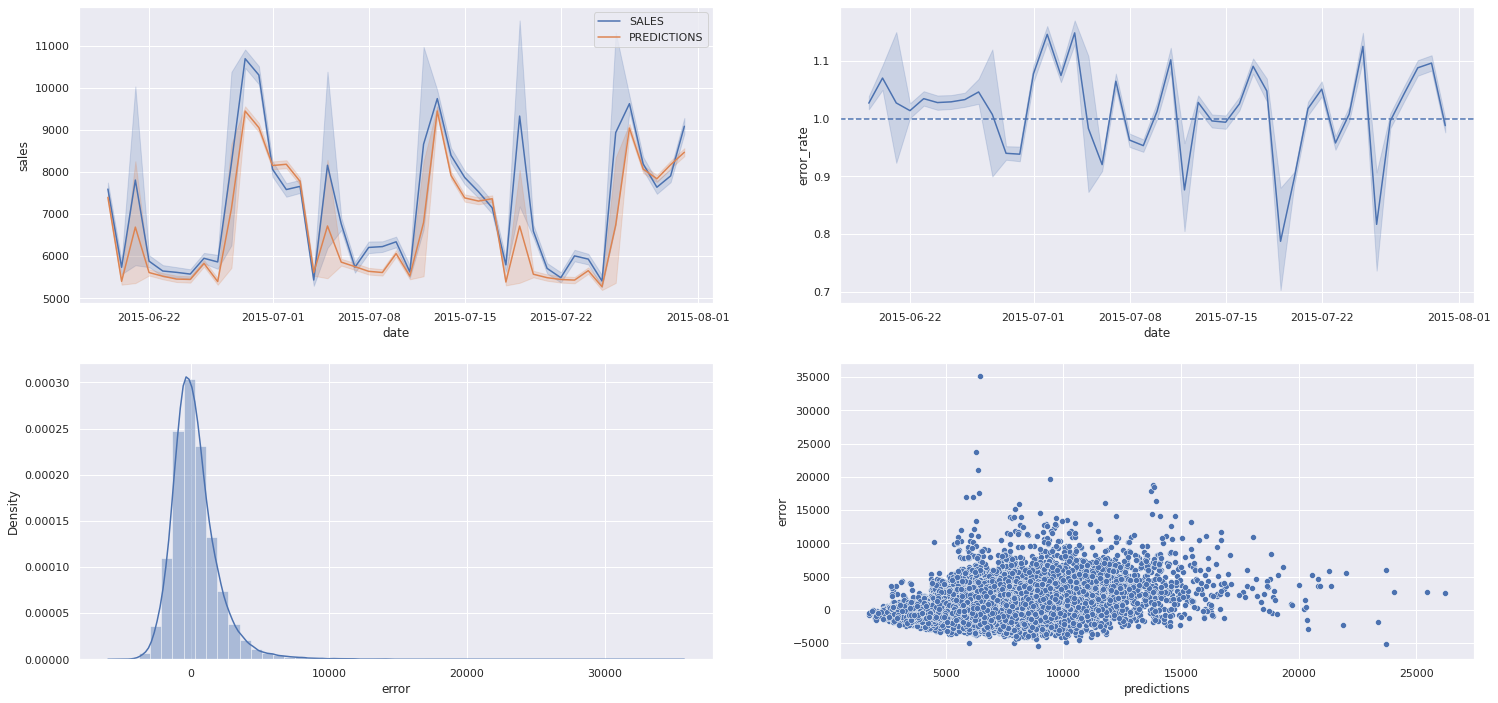

In [46]:
plt.subplot(2,2,1)
sns.lineplot(x='date',y='sales',data = df9, label = 'SALES')
sns.lineplot(x='date',y='predictions',data=df9, label='PREDICTIONS')

# bom para analisar Superestimação (acima do 1) e Subestimação (abaixo do 1)
plt.subplot(2,2,2)
sns.lineplot(x='date',y='error_rate',data = df9)
plt.axhline(1,linestyle='--')

# ficou uma distribuição normal
plt.subplot(2,2,3)
sns.distplot(df9['error'])

# Análise de Resíduo
plt.subplot(2,2,4)
sns.scatterplot(df9['predictions'],df9['error'])